In [3]:
%pip install anndata==0.10.8

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy
from scvi_colab import install
install()
run_outside_colab=True
import scvi
import scipy.sparse
import anndata as ad
import decoupler as dc
import torch
import pooch
import gzip
from gtfparse import read_gtf
from pybiomart import Dataset,Server

scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

from rds2py import as_summarized_experiment, read_rds
import os

/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(
[rank: 0] Global seed set to 0


Last run with scvi-tools version: 1.1.4


In [2]:
#%pip install scvi-tools==1.1.4

In [3]:
#%pip install torch==2.1.2

In [ ]:
atac = sc.read_h5ad('../../HIV_data/single_cell_scorch/atac/ctr_atac_HCcPL.h5ad')

In [5]:
atac

AnnData object with n_obs × n_vars = 12698 × 270101
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident'
    uns: 'X_name'
    layers: 'logcounts'

In [8]:
file_path='../../HIV_data/single_cell_scorch/atac/'
for file in os.listdir(file_path):
    print(file)
    if file=='ctr_atac_HCcPL.h5ad' or 'h5ad' not in file:
        continue
    temp = sc.read_h5ad(file_path+file)
    atac = ad.concat([atac,temp])

ctr_atac_HCcPL.h5ad
ctr_atac_HCTMW.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


.ipynb_checkpoints
ctr_atac_HCtNZ.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac6801187468.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac7200776574.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ctr_atac_HCTKN.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac6801066772.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac7102096765.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac7101847783.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ctr_atac_HCTTS.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


hiv_atac7100518287.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


ctr_atac_HCtME.h5ad


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [9]:
atac

AnnData object with n_obs × n_vars = 121660 × 270101
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident'
    layers: 'logcounts'

In [10]:
atac.var['genome_pos'] = atac.var.index

In [11]:
atac.var

genome_pos
chr1-9769-10686        chr1-9769-10686
chr1-180459-181772  chr1-180459-181772
chr1-183893-184837  chr1-183893-184837
chr1-186505-187539  chr1-186505-187539
chr1-190954-191942  chr1-190954-191942
...                                ...
chrM-1994-4168          chrM-1994-4168
chrM-4681-5647          chrM-4681-5647
chrM-5939-7081          chrM-5939-7081
chrM-7501-8801          chrM-7501-8801
chrM-9149-13094        chrM-9149-13094

[270101 rows x 1 columns]

In [12]:
for genome_pos in atac.var.index:
    atac.var.loc[genome_pos,'chr']=str(genome_pos).split("-")[0]
    atac.var.loc[genome_pos,'start']=str(genome_pos).split("-")[1]
    atac.var.loc[genome_pos,'end']=str(genome_pos).split("-")[2]

In [13]:
atac.var

genome_pos   chr   start     end
chr1-9769-10686        chr1-9769-10686  chr1    9769   10686
chr1-180459-181772  chr1-180459-181772  chr1  180459  181772
chr1-183893-184837  chr1-183893-184837  chr1  183893  184837
chr1-186505-187539  chr1-186505-187539  chr1  186505  187539
chr1-190954-191942  chr1-190954-191942  chr1  190954  191942
...                                ...   ...     ...     ...
chrM-1994-4168          chrM-1994-4168  chrM    1994    4168
chrM-4681-5647          chrM-4681-5647  chrM    4681    5647
chrM-5939-7081          chrM-5939-7081  chrM    5939    7081
chrM-7501-8801          chrM-7501-8801  chrM    7501    8801
chrM-9149-13094        chrM-9149-13094  chrM    9149   13094

[270101 rows x 4 columns]

In [14]:
atac

AnnData object with n_obs × n_vars = 121660 × 270101
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident'
    var: 'genome_pos', 'chr', 'start', 'end'
    layers: 'logcounts'

In [15]:
atac.obs

orig.ident  nCount_ATAC  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  SeuratProject       2083.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGCCAGA-1  SeuratProject       2501.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  SeuratProject        365.0   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  SeuratProject        271.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  SeuratProject       1051.0   
...                                             ...          ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  SeuratProject       5744.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGTTGCAA-1  SeuratProject       2104.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  SeuratProject       4729.0   

                                      nFeature_ATAC CellType  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1           2002  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGCCAGA-1           2393  L6 IT-1   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1            354    PVALB   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1            266  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1           1014      SST   
...                                             ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1           4843    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1            824    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGTTGCAA-1           1936    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1            857  L2-3 IT   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1           4205      OPC   

                                                 Sample    study  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGCCAGA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH  Spudich   
...                                                 ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGTTGCAA-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH  Spudich   

                                                 sample subclass class  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGCCAGA-1  HCcPL_CTR_PFC_MAH  L6 IT-1   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH    PVALB   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH      SST   InN   
...                                                 ...      ...   ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGTTGCAA-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  L2-3 IT   ExN   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH      OPC  Glia   

                                                     subtype          ident  
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  L2-3 CUX2 NTNG1 COL5A2  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCAAGCCAGA-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1         InN PVALB ANOS1  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1          InN SST THSD7B  SeuratProject  
...                                                      ...            ...  
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1        Oligo MOG OPALIN  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1        Oligo MOG OPALIN  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTGTTGCAA-1        Oli

In [16]:
glia = sc.read('../../HIV_data/single_cell_scorch/glia_v2_updated.h5ad')
nn = sc.read('../../HIV_data/single_cell_scorch/nn_v2_updated.h5ad')
exc = sc.read('../../HIV_data/single_cell_scorch/exc_v2_updated.h5ad')
inh = sc.read('../../HIV_data/single_cell_scorch/inh_v2_updated.h5ad')

In [29]:
adata_rna=nn

In [30]:
# Healthy control samples
controls = list(np.where(
    (adata_rna.obs['sample'].str.contains('HCCCY')) |
    (adata_rna.obs['sample'].str.contains('HCCRS')) |
    (adata_rna.obs['sample'].str.contains('HCTGD')) |
    (adata_rna.obs['sample'].str.contains('HCTKN')) |
    (adata_rna.obs['sample'].str.contains('HCTLI')) |
    (adata_rna.obs['sample'].str.contains('HCTMU')) |
    (adata_rna.obs['sample'].str.contains('HCTMW')) |
    (adata_rna.obs['sample'].str.contains('HCTPK')) |
    (adata_rna.obs['sample'].str.contains('HCTTS')) |
    (adata_rna.obs['sample'].str.contains('HCTXJ')) |
    (adata_rna.obs['sample'].str.contains('HCcPL')) |
    (adata_rna.obs['sample'].str.contains('HCtME')) |
    (adata_rna.obs['sample'].str.contains('HCtNZ'))
)[0])

# HIV samples excluding OUD
hiv = list(np.where(
    (adata_rna.obs['sample'].str.contains('10280')) |
    (adata_rna.obs['sample'].str.contains('10288')) |
    (adata_rna.obs['sample'].str.contains('10304')) |
    (adata_rna.obs['sample'].str.contains('10305')) |
    (adata_rna.obs['sample'].str.contains('1068')) |
    (adata_rna.obs['sample'].str.contains('1129')) |
    (adata_rna.obs['sample'].str.contains('1137')) |
    (adata_rna.obs['sample'].str.contains('6801066772')) |
    (adata_rna.obs['sample'].str.contains('6801187468')) |
    (adata_rna.obs['sample'].str.contains('7100518287')) |
    (adata_rna.obs['sample'].str.contains('7101847783')) |
    (adata_rna.obs['sample'].str.contains('7102096765')) |
    (adata_rna.obs['sample'].str.contains('7200776574')) 
)[0])

In [19]:
#Glia
adata_rna=adata_rna[controls+hiv]
adata_rna

View of AnnData object with n_obs × n_vars = 87831 × 42748
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'study', 'subtype', 'subclass', 'class', 'TopSubclassScore', 'TopClassScore', 'TopSubtypeScore', 'integrated_snn_res.0.5', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_ids', 'n_cells'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'subclass_colors', 'subtype_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts'
    obsp: 'connectivities', 'distances'

In [20]:
atac_glia = list(set(atac.obs.index).intersection(adata_rna.obs.index))
len(atac_glia)

41675

In [23]:
#Exc
adata_rna=adata_rna[controls+hiv]
adata_rna

View of AnnData object with n_obs × n_vars = 53077 × 45844
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'study', 'subtype', 'subclass', 'class', 'TopSubclassScore', 'TopClassScore', 'TopSubtypeScore', 'integrated_snn_res.0.5', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_ids', 'n_cells'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'subclass_colors', 'subtype_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts'
    obsp: 'connectivities', 'distances'

In [24]:
atac_exc = list(set(atac.obs.index).intersection(adata_rna.obs.index))
len(atac_exc)

21345

In [27]:
#Inh
adata_rna=adata_rna[controls+hiv]
adata_rna

View of AnnData object with n_obs × n_vars = 23425 × 40563
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'study', 'subtype', 'subclass', 'class', 'TopSubclassScore', 'TopClassScore', 'TopSubtypeScore', 'integrated_snn_res.0.5', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_ids', 'n_cells'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'subclass_colors', 'subtype_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts'
    obsp: 'connectivities', 'distances'

In [28]:
atac_inh = list(set(atac.obs.index).intersection(adata_rna.obs.index))
len(atac_inh)

8999

In [31]:
#NN
adata_rna=adata_rna[controls+hiv]
adata_rna

View of AnnData object with n_obs × n_vars = 3773 × 31463
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'study', 'subtype', 'subclass', 'class', 'TopSubclassScore', 'TopClassScore', 'TopSubtypeScore', 'integrated_snn_res.0.5', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'doublet'
    var: 'gene_ids', 'n_cells'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'subclass_colors', 'subtype_colors', 'umap'
    obsm: 'PCA', 'UMAP', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts'
    obsp: 'connectivities', 'distances'

In [32]:
atac_nn = list(set(atac.obs.index).intersection(adata_rna.obs.index))
len(atac_nn)

2221

In [33]:
len(atac_glia+atac_exc+atac_inh+atac_nn)

74240

In [34]:
all_atac=list(
    np.where(
        (atac.obs.index.isin(atac_glia+atac_exc+atac_inh+atac_nn))
    )[0]
)

In [35]:
atac.obs.loc[atac_glia+atac_exc+atac_inh+atac_nn]

orig.ident  nCount_ATAC  \
HCtNZ_CTR_PFC_MAH_TAGTGTGGTTCGCTCA-1       SeuratProject       2118.0   
HCtNZ_CTR_PFC_MAH_CGCACCACACCTACTT-1       SeuratProject        379.0   
HCtNZ_CTR_PFC_MAH_TACTGAGGTCAGGAAG-1       SeuratProject        647.0   
7101847783_HIV_PFC_MAH_ACTCACCTCTAGCTTT-1  SeuratProject       4825.0   
7101847783_HIV_PFC_MAH_AGTCAGGCAATTAAGG-1  SeuratProject       7935.0   
...                                                  ...          ...   
HCtNZ_CTR_PFC_MAH_CTGATCACAAGGAATC-1       SeuratProject       2491.0   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1       SeuratProject       2600.0   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1       SeuratProject       2600.0   
HCtME_CTR_PFC_MAH_ACCCGCTGTAAGCTTG-1       SeuratProject       1814.0   
HCtME_CTR_PFC_MAH_TAGCCTCTCTATTGTC-1       SeuratProject       6459.0   

                                           nFeature_ATAC CellType  \
HCtNZ_CTR_PFC_MAH_TAGTGTGGTTCGCTCA-1                1986    Astro   
HCtNZ_CTR_PFC_MAH_CGCACCACACCTACTT-1                 373    Astro   
HCtNZ_CTR_PFC_MAH_TACTGAGGTCAGGAAG-1                 634      OPC   
7101847783_HIV_PFC_MAH_ACTCACCTCTAGCTTT-1           4304    Oligo   
7101847783_HIV_PFC_MAH_AGTCAGGCAATTAAGG-1           6686    Oligo   
...                                                  ...      ...   
HCtNZ_CTR_PFC_MAH_CTGATCACAAGGAATC-1                2262   Immune   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1                1960     Endo   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1                1960     Endo   
HCtME_CTR_PFC_MAH_ACCCGCTGTAAGCTTG-1                1495     Endo   
HCtME_CTR_PFC_MAH_TAGCCTCTCTATTGTC-1                3393       PC   

                                                           Sample    study  \
HCtNZ_CTR_PFC_MAH_TAGTGTGGTTCGCTCA-1            HCtNZ_CTR_PFC_MAH  Spudich   
HCtNZ_CTR_PFC_MAH_CGCACCACACCTACTT-1            HCtNZ_CTR_PFC_MAH  Spudich   
HCtNZ_CTR_PFC_MAH_TACTGAGGTCAGGAAG-1            HCtNZ_CTR_PFC_MAH  Spudich   
7101847783_HIV_PFC_MAH_ACTCACCTCTAGCTTT-1  7101847783_HIV_PFC_MAH  Spudich   
7101847783_HIV_PFC_MAH_AGTCAGGCAATTAAGG-1  7101847783_HIV_PFC_MAH  Spudich   
...                                                           ...      ...   
HCtNZ_CTR_PFC_MAH_CTGATCACAAGGAATC-1            HCtNZ_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1            HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1            HCcPL_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_ACCCGCTGTAAGCTTG-1            HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TAGCCTCTCTATTGTC-1            HCtME_CTR_PFC_MAH  Spudich   

                                                           sample subclass  \
HCtNZ_CTR_PFC_MAH_TAGTGTGGTTCGCTCA-1            HCtNZ_CTR_PFC_MAH    Astro   
HCtNZ_CTR_PFC_MAH_CGCACCACACCTACTT-1            HCtNZ_CTR_PFC_MAH    Astro   
HCtNZ_CTR_PFC_MAH_TACTGAGGTCAGGAAG-1            HCtNZ_CTR_PFC_MAH      OPC   
7101847783_HIV_PFC_MAH_ACTCACCTCTAGCTTT-1  7101847783_HIV_PFC_MAH    Oligo   
7101847783_HIV_PFC_MAH_AGTCAGGCAATTAAGG-1  7101847783_HIV_PFC_MAH    Oligo   
...                                                           ...      ...   
HCtNZ_CTR_PFC_MAH_CTGATCACAAGGAATC-1            HCtNZ_CTR_PFC_MAH   Immune   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1            HCcPL_CTR_PFC_MAH     Endo   
HCcPL_CTR_PFC_MAH_GCTAAGAAGGCCTGGT-1            HCcPL_CTR_PFC_MAH     Endo   
HCtME_CTR_PFC_MAH_ACCCGCTGTAAGCTTG-1            HCtME_CTR_PFC_MAH     Endo   
HCtME_CTR_PFC_MAH_TAGCCTCTCTATTGTC-1            HCtME_CTR_PFC_MAH       PC   

                                          class              subtype  \
HCtNZ_CTR_PFC_MAH_TAGTGTGGTTCGCTCA-1       Glia      Astro GFAP AQP1   
HCtNZ_CTR_PFC_MAH_CGCACCACACCTACTT-1       Glia    Astro AQP4 SLC1A2   
HCtNZ_CTR_PFC_MAH_TACTGAGGTCAGGAAG-1       Glia    OPC PDGFRA PCDH15   
7101847783_HIV_PFC_MAH_ACTCACCTCTAGCTTT-1  Glia     Oligo MOG OPALIN   
7101847783_HIV_PFC_MAH_AGTCAGGCAATTAAGG-1  Glia     Oligo MOG OPALIN   
...                               

In [36]:
len(set(atac_nn))

2221

In [37]:
atac[all_atac].obs.drop_duplicates()

orig.ident  nCount_ATAC  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  SeuratProject       2083.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  SeuratProject        365.0   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  SeuratProject        271.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  SeuratProject       1051.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  SeuratProject        426.0   
...                                             ...          ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  SeuratProject      12417.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  SeuratProject       5744.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  SeuratProject       4729.0   

                                      nFeature_ATAC CellType  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1           2002  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1            354    PVALB   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1            266  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1           1014      SST   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1            396  L6 IT-1   
...                                             ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1          10474    PVALB   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1           4843    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1            824    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1            857  L2-3 IT   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1           4205      OPC   

                                                 Sample    study  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  Spudich   
...                                                 ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH  Spudich   

                                                 sample subclass class  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH    PVALB   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH      SST   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  L6 IT-1   ExN   
...                                                 ...      ...   ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH    PVALB   InN   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  L2-3 IT   ExN   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH      OPC  Glia   

                                                     subtype          ident  
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  L2-3 CUX2 NTNG1 COL5A2  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1         InN PVALB ANOS1  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1          InN SST THSD7B  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
...                                                      ...            ...  
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1         InN PVALB ANOS1  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1        Oligo MOG OPALIN  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1        Oli

In [38]:
atac=atac[all_atac]

In [39]:
atac.obs.drop_duplicates()

orig.ident  nCount_ATAC  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  SeuratProject       2083.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  SeuratProject        365.0   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  SeuratProject        271.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  SeuratProject       1051.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  SeuratProject        426.0   
...                                             ...          ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  SeuratProject      12417.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  SeuratProject       5744.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  SeuratProject       4729.0   

                                      nFeature_ATAC CellType  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1           2002  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1            354    PVALB   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1            266  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1           1014      SST   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1            396  L6 IT-1   
...                                             ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1          10474    PVALB   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1           4843    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1            824    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1            857  L2-3 IT   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1           4205      OPC   

                                                 Sample    study  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  Spudich   
...                                                 ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH  Spudich   

                                                 sample subclass class  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH    PVALB   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH      SST   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  L6 IT-1   ExN   
...                                                 ...      ...   ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH    PVALB   InN   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  L2-3 IT   ExN   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH      OPC  Glia   

                                                     subtype          ident  
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  L2-3 CUX2 NTNG1 COL5A2  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1         InN PVALB ANOS1  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1          InN SST THSD7B  SeuratProject  
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1    L6 OPRK1 THEMIS RGS6  SeuratProject  
...                                                      ...            ...  
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1         InN PVALB ANOS1  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1        Oligo MOG OPALIN  SeuratProject  
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1        Oli

In [40]:
print((atac.X == 1).sum())
print((atac.X == 2).sum())

289907296
23690851


In [41]:
scvi.data.reads_to_fragments(atac)
atac

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 89734 × 270101
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident'
    var: 'genome_pos', 'chr', 'start', 'end'
    layers: 'logcounts', 'fragments'

In [42]:
print((atac.layers["fragments"] == 1).sum())
print((atac.layers["fragments"] == 2).sum())

313598147
3487458


In [44]:
print("# regions before filtering:", atac.shape[-1])

# compute the threshold: 5% of the cells
#min_cells = int(atac.shape[0] * 0.05)
# in-place filtering of regions
sc.pp.filter_genes(atac, min_cells=200)

print("# regions after filtering:", atac.shape[-1])

sc.pp.filter_cells(atac, min_genes = 200)
atac

# regions before filtering: 269149
# regions after filtering: 260424


AnnData object with n_obs × n_vars = 85234 × 260424
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident', 'n_genes'
    var: 'genome_pos', 'chr', 'start', 'end', 'n_cells'
    layers: 'logcounts', 'fragments'

In [1]:
scvi.external.POISSONVI.setup_anndata(atac, layer="fragments")
model = scvi.external.POISSONVI(atac)
model.train()

POISSONVI_LATENT_KEY = "X_poissonvi"

latent = model.get_latent_representation()
atac.obsm[POISSONVI_LATENT_KEY] = latent
latent.shape

In [46]:
POISSONVI_CLUSTERS_KEY = "clusters_poissonvi"

# compute the k-nearest-neighbor graph that is used in both clustering and umap algorithms
sc.pp.neighbors(atac, use_rep=POISSONVI_LATENT_KEY)
# compute the umap
sc.tl.umap(atac, min_dist=0.2)
# cluster the space (we use a lower resolution to get fewer clusters than the default)
sc.tl.leiden(atac, key_added=POISSONVI_CLUSTERS_KEY, resolution=0.2)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/uma

... storing 'chr' as categorical
... storing 'start' as categorical
... storing 'end' as categorical
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


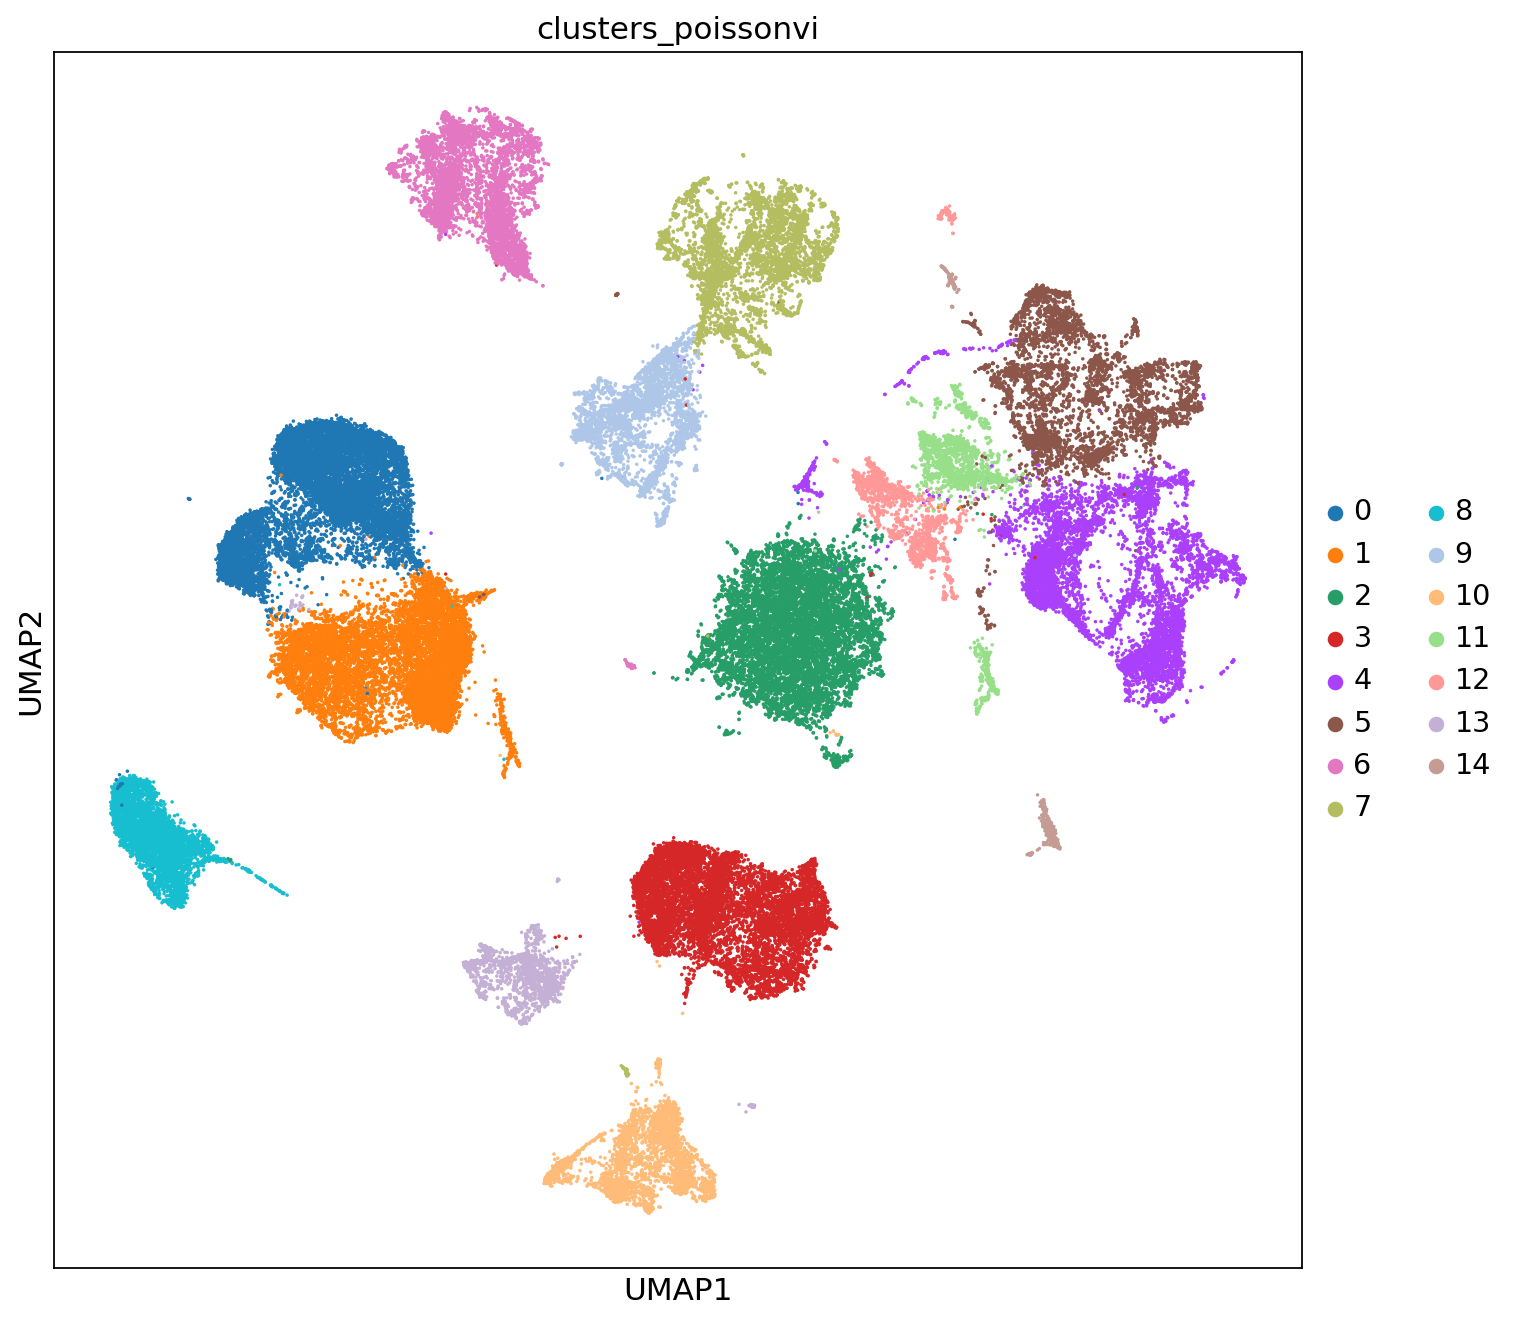

In [47]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(atac, color=POISSONVI_CLUSTERS_KEY,size=10)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


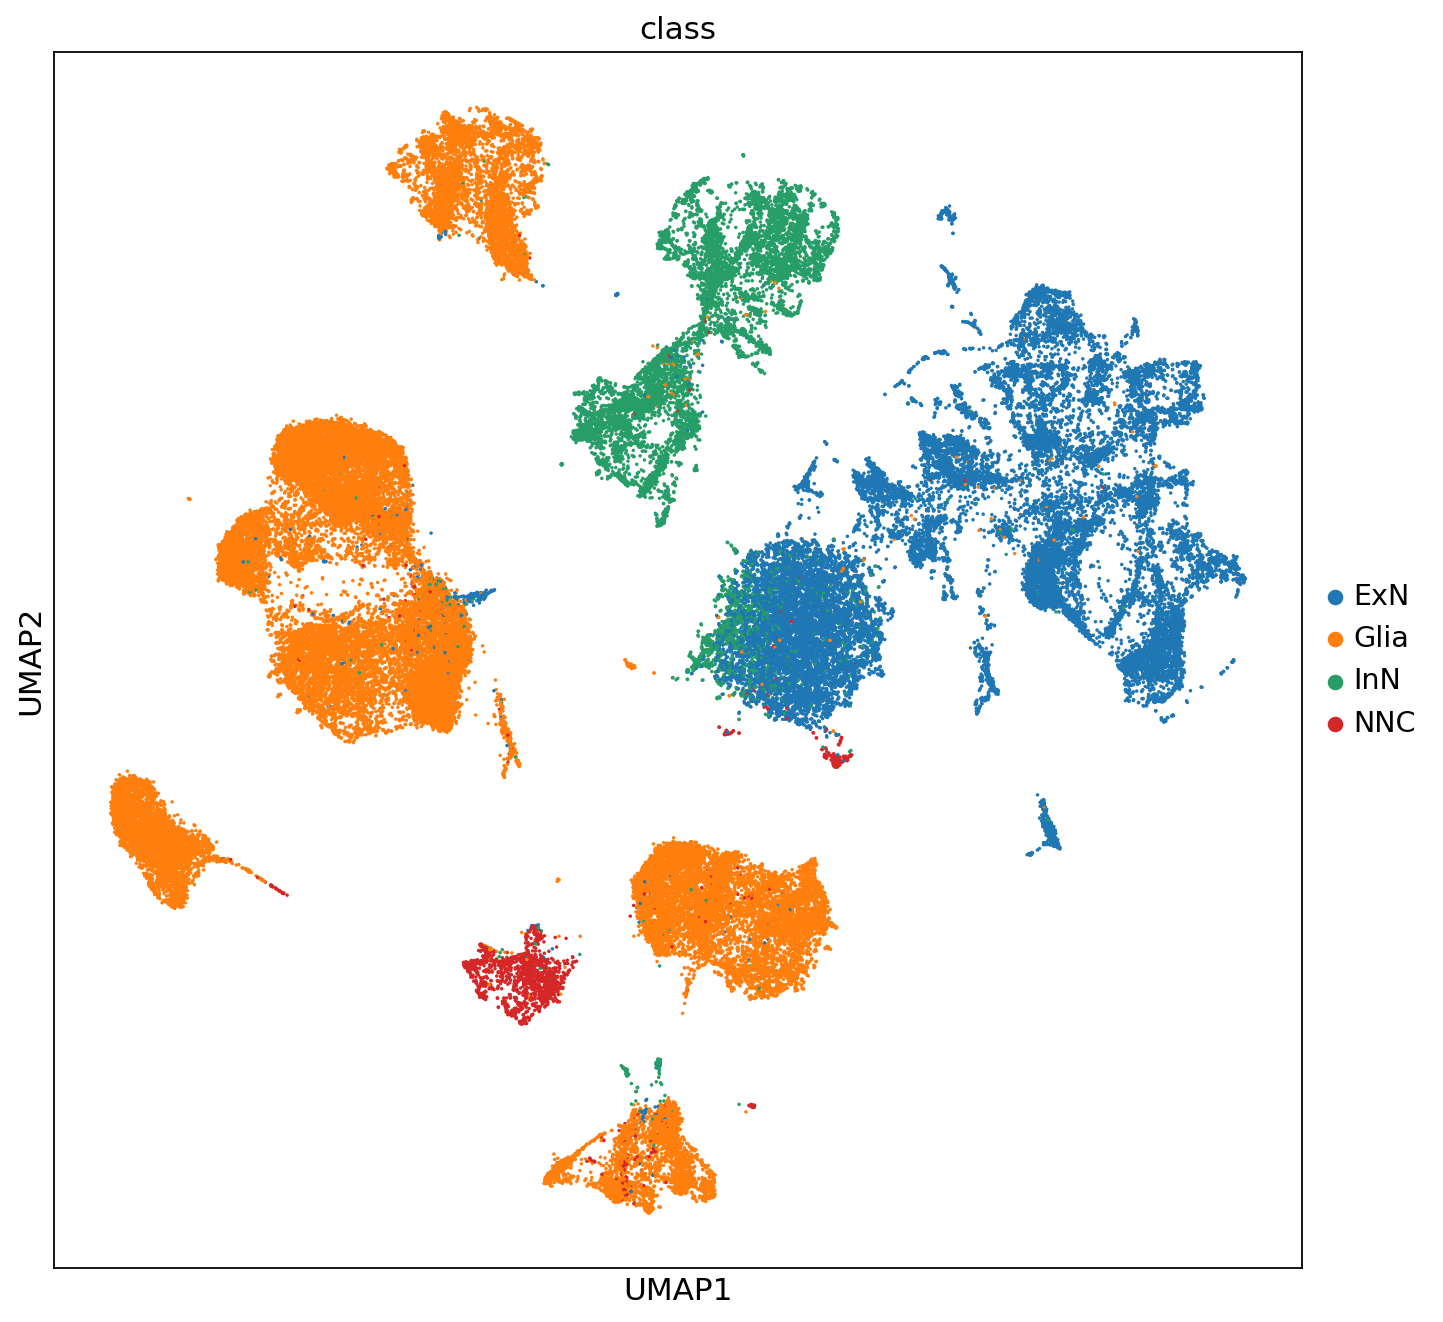

In [48]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(atac, color="class",size=10)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


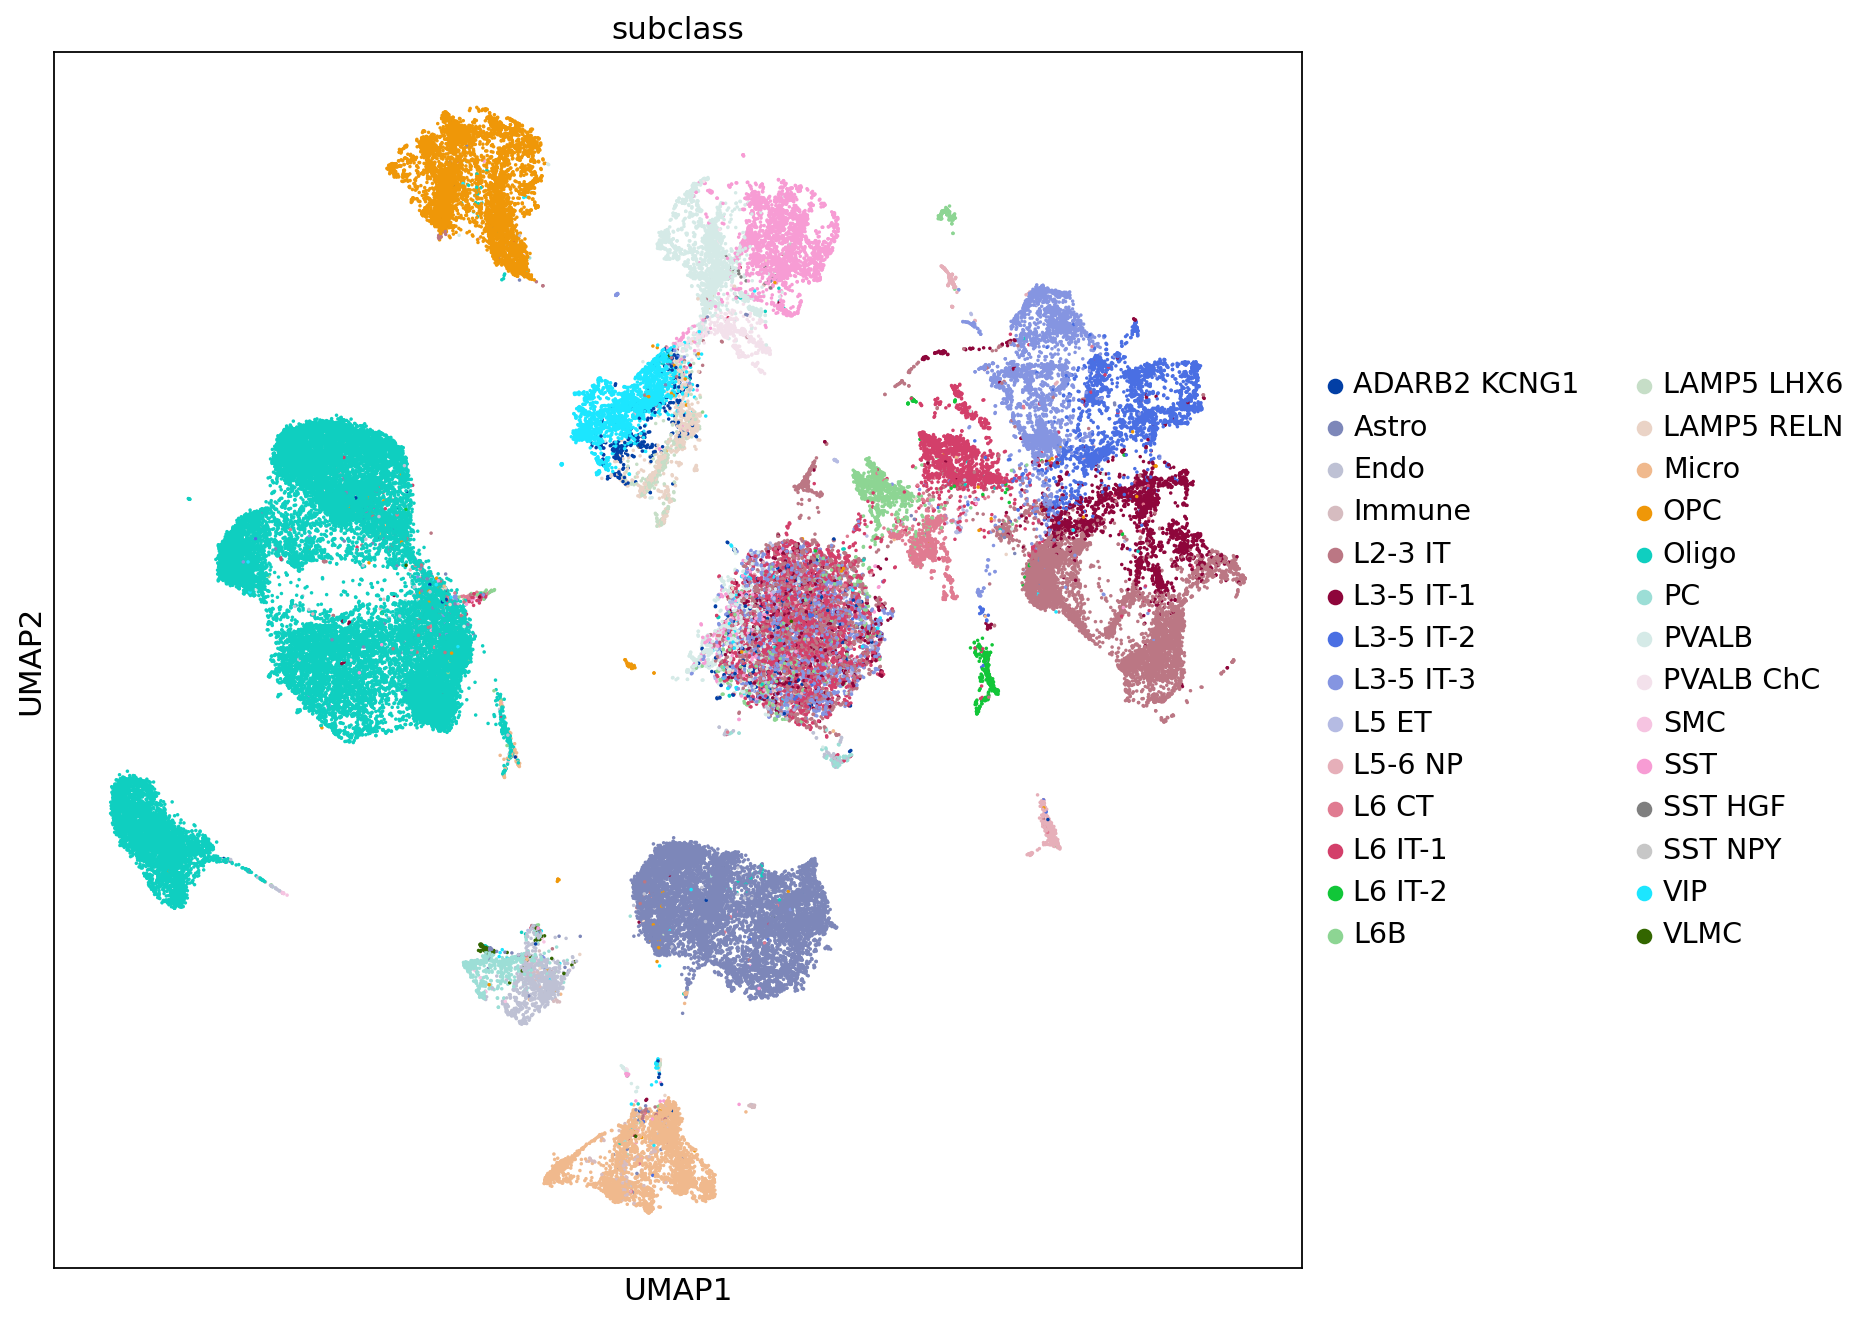

In [49]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(atac, color="subclass",size=10)

In [3]:
exc=list(np.where(atac.obs['class']=='ExN')[0])
inh=list(np.where(atac.obs['class']=='InN')[0])
nnc=list(np.where(atac.obs['class']=='NNC')[0])
glia=list(np.where(atac.obs['class']=='Glia')[0])

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


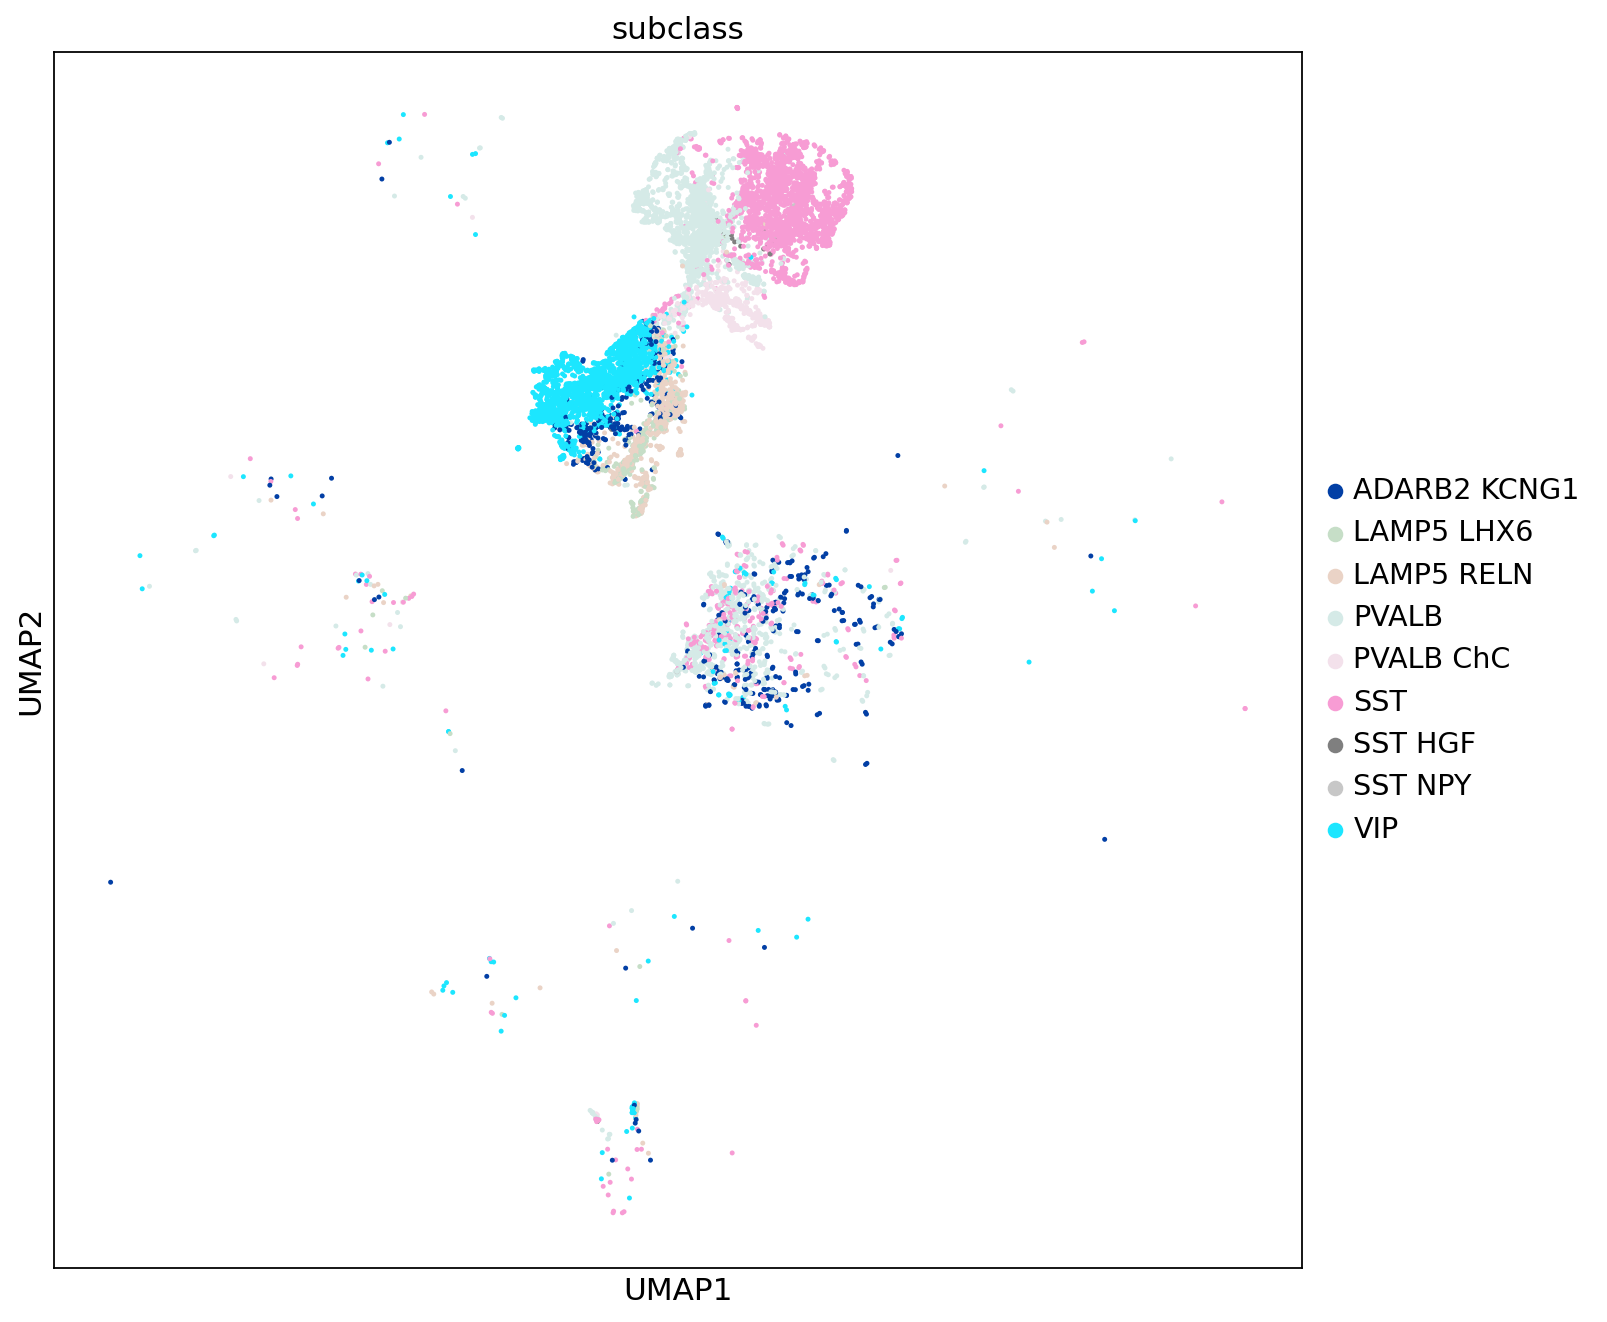

In [51]:
sc.pl.umap(atac[inh], color="subclass",size=20)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


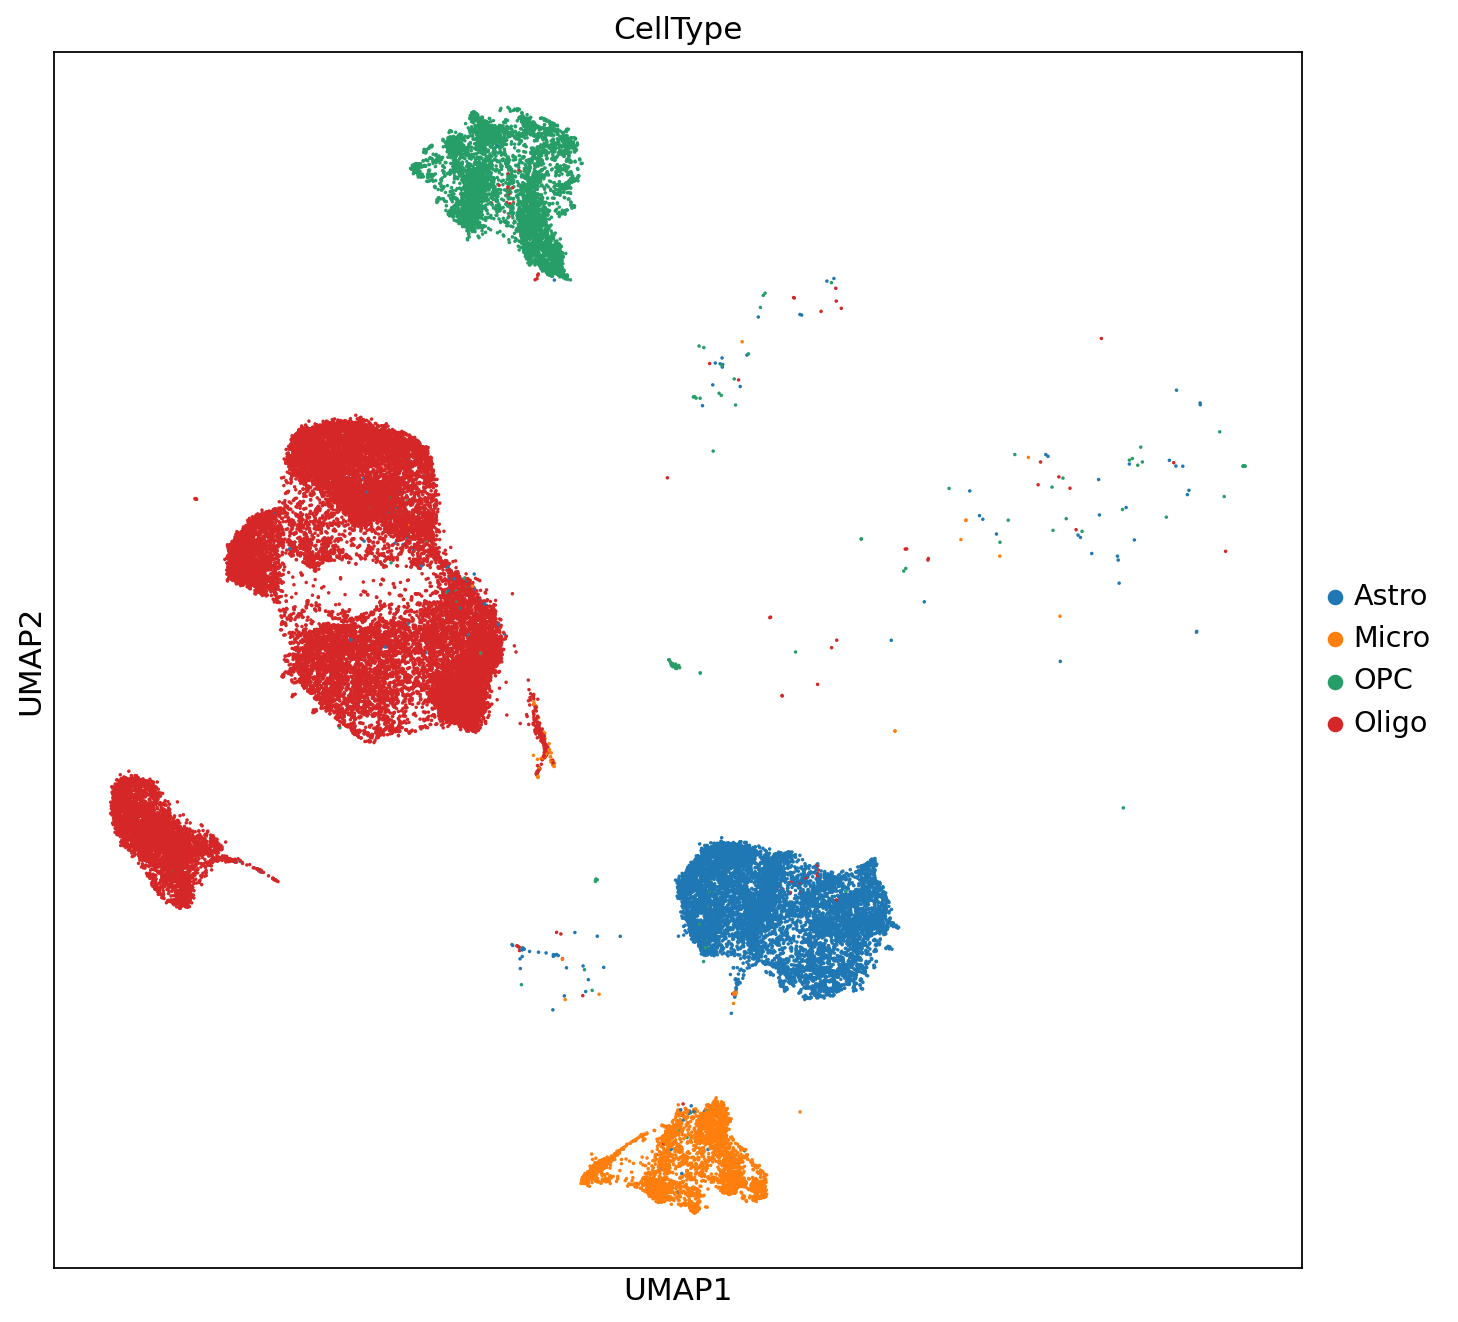

In [52]:
sc.pl.umap(atac[glia], color="CellType",size=10)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


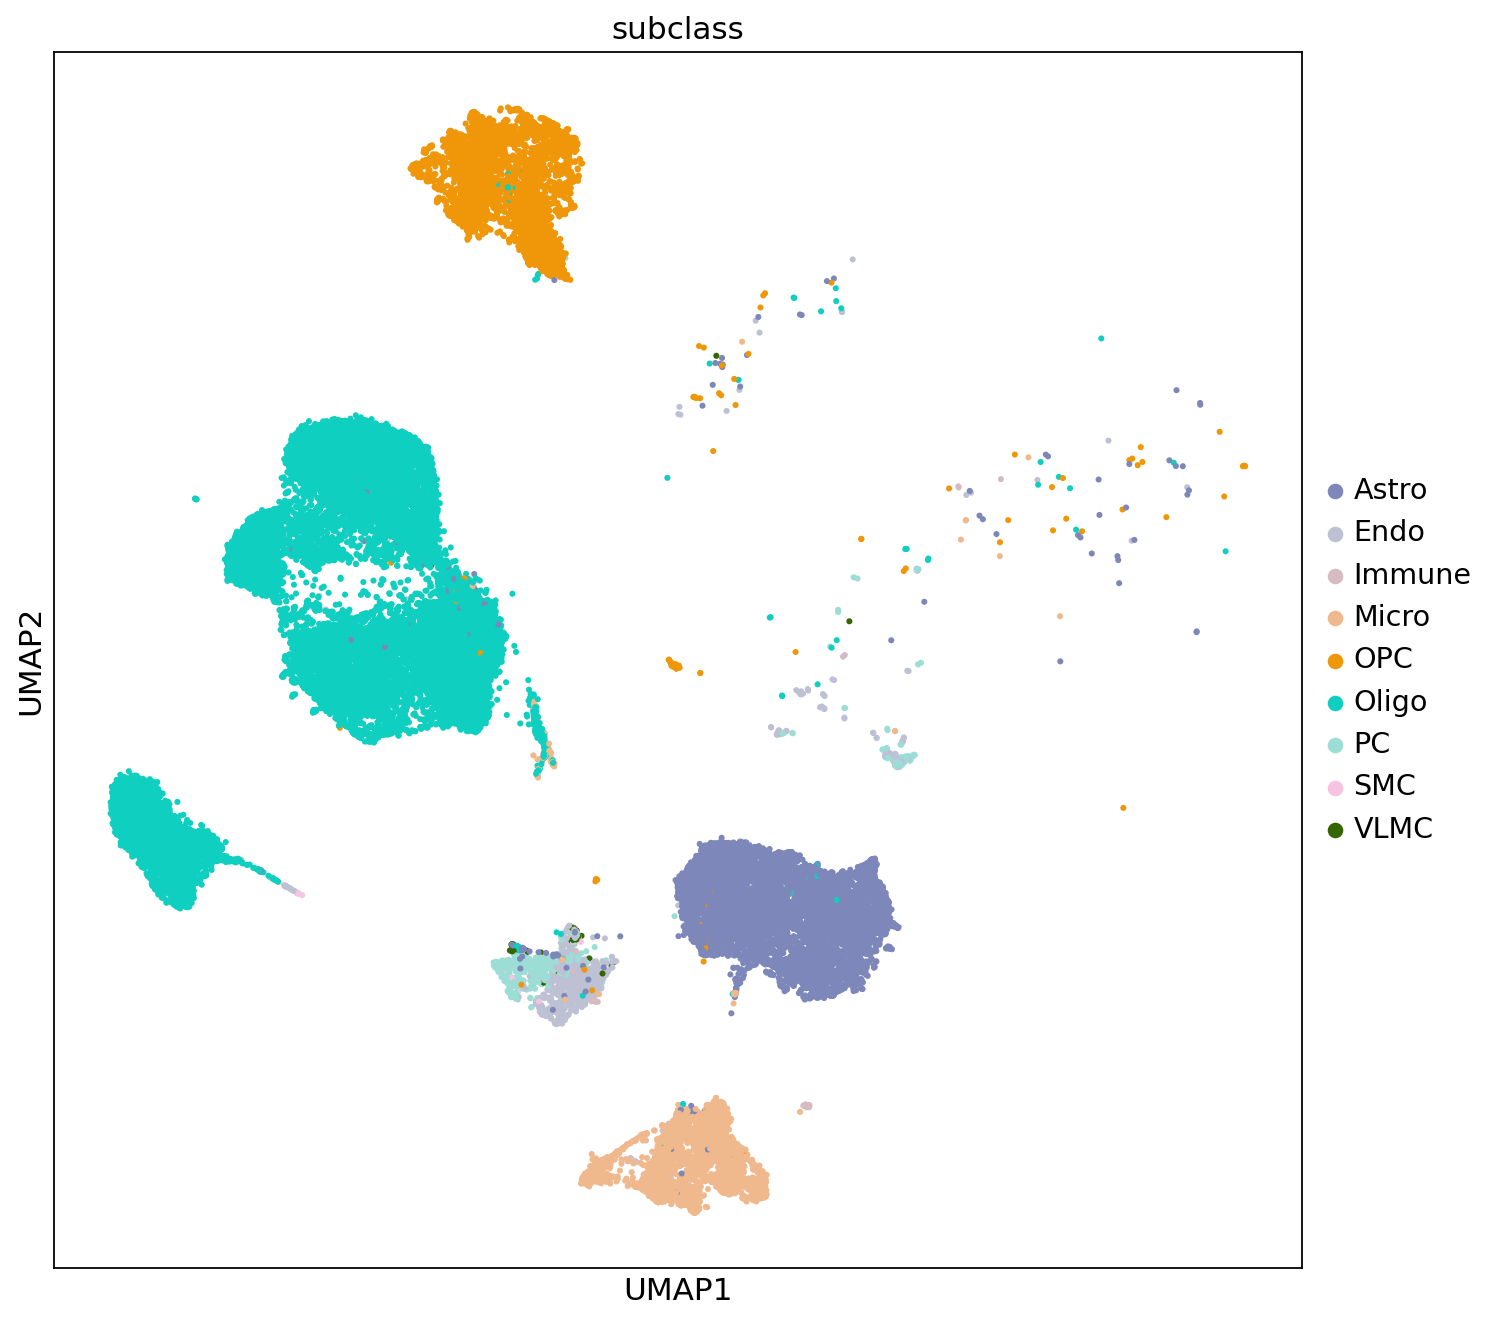

In [53]:
sc.pl.umap(atac[nnc+glia], color="subclass",size=30)

In [54]:
pd.unique(atac[inh].obs.subclass)

['PVALB', 'SST', 'VIP', 'ADARB2 KCNG1', 'LAMP5 RELN', 'PVALB ChC', 'LAMP5 LHX6', 'SST NPY', 'SST HGF']
Categories (9, object): ['ADARB2 KCNG1', 'LAMP5 LHX6', 'LAMP5 RELN', 'PVALB', ..., 'SST', 'SST HGF', 'SST NPY', 'VIP']

In [55]:
exc_neu=['L2-3 IT','L3-5 IT-1','L3-5 IT-2','L3-5 IT-3','L5 ET','L5-6 NP','L6 CT','L6 IT-1','L6 IT-2','L6B']
inh_neu=['SST', 'PVALB', 'VIP', 'ADARB2 KCNG1', 'LAMP5 RELN', 'PVALB ChC', 'LAMP5 LHX6', 'SST NPY', 'SST HGF']

In [56]:
pd.unique(atac[exc].obs['CellType'])

['L2-3 IT', 'L6 IT-1', 'L3-5 IT-3', 'L5 ET', 'L3-5 IT-1', 'L6B', 'L3-5 IT-2', 'L5-6 NP', 'L6 CT', 'L6 IT-2']
Categories (10, object): ['L2-3 IT', 'L3-5 IT-1', 'L3-5 IT-2', 'L3-5 IT-3', ..., 'L6 CT', 'L6 IT-1', 'L6 IT-2', 'L6B']

In [57]:
atac.obs.iloc[np.where((atac.obs['class']=='NNC')& 
                       ((atac.obs['subclass'].isin(exc_neu)))
                      )[0],:]

Empty DataFrame
Columns: [orig.ident, nCount_ATAC, nFeature_ATAC, CellType, Sample, study, sample, subclass, class, subtype, ident, n_genes, _scvi_batch, _scvi_labels, clusters_poissonvi]
Index: []

In [58]:
cond1 = 'hiv'
cond2 = 'controls'
atac.obs['condition'] = np.where(((atac.obs['sample'].str.contains('HCCCY')) |
    (atac.obs['sample'].str.contains('HCCRS')) | (atac.obs['sample'].str.contains('HCTGD')) | 
    (atac.obs['sample'].str.contains('HCTKN')) | (atac.obs['sample'].str.contains('HCTLI')) |
    (atac.obs['sample'].str.contains('HCTMU')) | (atac.obs['sample'].str.contains('HCTMW')) |
    (atac.obs['sample'].str.contains('HCTPK')) | (atac.obs['sample'].str.contains('HCTTS')) |
    (atac.obs['sample'].str.contains('HCTXJ')) | (atac.obs['sample'].str.contains('HCcPL')) |
    (atac.obs['sample'].str.contains('HCtME')) | (atac.obs['sample'].str.contains('HCtNZ'))
                                         ),cond2,cond1)
atac.obs

orig.ident  nCount_ATAC  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  SeuratProject       2083.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  SeuratProject        365.0   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  SeuratProject        271.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  SeuratProject       1051.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  SeuratProject        426.0   
...                                             ...          ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  SeuratProject      12417.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  SeuratProject       5744.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  SeuratProject       4729.0   

                                      nFeature_ATAC CellType  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1           2002  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1            354    PVALB   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1            266  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1           1014      SST   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1            396  L6 IT-1   
...                                             ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1          10474    PVALB   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1           4843    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1            824    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1            857  L2-3 IT   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1           4205      OPC   

                                                 Sample    study  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  Spudich   
...                                                 ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH  Spudich   

                                                 sample subclass class  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH    PVALB   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH      SST   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  L6 IT-1   ExN   
...                                                 ...      ...   ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH    PVALB   InN   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  L2-3 IT   ExN   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH      OPC  Glia   

                                                     subtype          ident  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  L2-3 CUX2 NTNG1 COL5A2  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1         InN PVALB ANOS1  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1    L6 OPRK1 THEMIS RGS6  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1          InN SST THSD7B  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1    L6 OPRK1 THEMIS RGS6  SeuratProject   
...                                                      ...            ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1         InN PVALB ANOS1  SeuratProject   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1        Oligo MOG OPALIN  SeuratProject   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  

In [59]:
for i,sub in enumerate(atac.obs['subclass']):
    if sub in ['Astro']:
        atac.obs.loc[atac.obs.index[i],'cell_family']='Astro'
    elif sub in ['Micro','Immune']:
        atac.obs.loc[atac.obs.index[i],'cell_family']='Immune'
    elif sub in ['Endo','PC','SMC','VLMC']:
        atac.obs.loc[atac.obs.index[i],'cell_family']='Vascular'
    elif sub in ['Oligo']:
        atac.obs.loc[atac.obs.index[i],'cell_family']='Oligo'
    elif sub in ['OPC']: atac.obs.loc[atac.obs.index[i],'cell_family']='OPC'
    elif sub in exc_neu: atac.obs.loc[atac.obs.index[i],'cell_family']='Exc'
    elif sub in inh_neu: atac.obs.loc[atac.obs.index[i],'cell_family']='Inh'

In [60]:
atac.obs

orig.ident  nCount_ATAC  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  SeuratProject       2083.0   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  SeuratProject        365.0   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  SeuratProject        271.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  SeuratProject       1051.0   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  SeuratProject        426.0   
...                                             ...          ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  SeuratProject      12417.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  SeuratProject       5744.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  SeuratProject        867.0   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  SeuratProject       4729.0   

                                      nFeature_ATAC CellType  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1           2002  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1            354    PVALB   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1            266  L2-3 IT   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1           1014      SST   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1            396  L6 IT-1   
...                                             ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1          10474    PVALB   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1           4843    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1            824    Oligo   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1            857  L2-3 IT   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1           4205      OPC   

                                                 Sample    study  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH  Spudich   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  Spudich   
...                                                 ...      ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  Spudich   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH  Spudich   

                                                 sample subclass class  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1  HCcPL_CTR_PFC_MAH    PVALB   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1  HCcPL_CTR_PFC_MAH  L2-3 IT   ExN   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1  HCcPL_CTR_PFC_MAH      SST   InN   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1  HCcPL_CTR_PFC_MAH  L6 IT-1   ExN   
...                                                 ...      ...   ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1  HCtME_CTR_PFC_MAH    PVALB   InN   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  HCtME_CTR_PFC_MAH    Oligo  Glia   
HCtME_CTR_PFC_MAH_TTTGTTGGTTGCTTCG-1  HCtME_CTR_PFC_MAH  L2-3 IT   ExN   
HCtME_CTR_PFC_MAH_TTTGTTGGTTTATCTG-1  HCtME_CTR_PFC_MAH      OPC  Glia   

                                                     subtype          ident  \
HCcPL_CTR_PFC_MAH_AAACAGCCAAAGGCCA-1  L2-3 CUX2 NTNG1 COL5A2  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCAAGGTCCT-1         InN PVALB ANOS1  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCACCATATG-1    L6 OPRK1 THEMIS RGS6  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCATAAGGAC-1          InN SST THSD7B  SeuratProject   
HCcPL_CTR_PFC_MAH_AAACAGCCATGTGGGA-1    L6 OPRK1 THEMIS RGS6  SeuratProject   
...                                                      ...            ...   
HCtME_CTR_PFC_MAH_TTTGTTGGTAATAGCT-1         InN PVALB ANOS1  SeuratProject   
HCtME_CTR_PFC_MAH_TTTGTTGGTAGGATCC-1        Oligo MOG OPALIN  SeuratProject   
HCtME_CTR_PFC_MAH_TTTGTTGGTGGTTATG-1  

In [62]:
atac.write_h5ad('../../results/SCORCH_HIV/atac_updated.h5ad',compression='gzip')

In [7]:
atac=sc.read_h5ad('../../results/SCORCH_HIV/atac_updated.h5ad')
atac

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 85234 × 260424
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'clusters_poissonvi', 'condition', 'cell_family'
    var: 'genome_pos', 'chr', 'start', 'end', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_family_colors', 'class_colors', 'clusters_poissonvi_colors', 'leiden', 'neighbors', 'subclass_colors', 'umap'
    obsm: 'X_poissonvi', 'X_umap'
    layers: 'fragments', 'logcounts'
    obsp: 'connectivities', 'distances'

In [3]:
atac

AnnData object with n_obs × n_vars = 85234 × 260424
    obs: 'orig.ident', 'nCount_ATAC', 'nFeature_ATAC', 'CellType', 'Sample', 'study', 'sample', 'subclass', 'class', 'subtype', 'ident', 'n_genes', '_scvi_batch', '_scvi_labels', 'clusters_poissonvi', 'condition', 'cell_family'
    var: 'genome_pos', 'chr', 'start', 'end', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cell_family_colors', 'class_colors', 'clusters_poissonvi_colors', 'leiden', 'neighbors', 'subclass_colors', 'umap'
    obsm: 'X_poissonvi', 'X_umap'
    layers: 'fragments', 'logcounts'
    obsp: 'connectivities', 'distances'

In [3]:
atac.uns['cell_family_colors']=[
    '#abd1f0',
               '#b39ede',
               '#aaf3c9',
               '#e8c8f5',
               '#dea2a6',
               '#f5c8ca',
               '#e377c2'
]

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


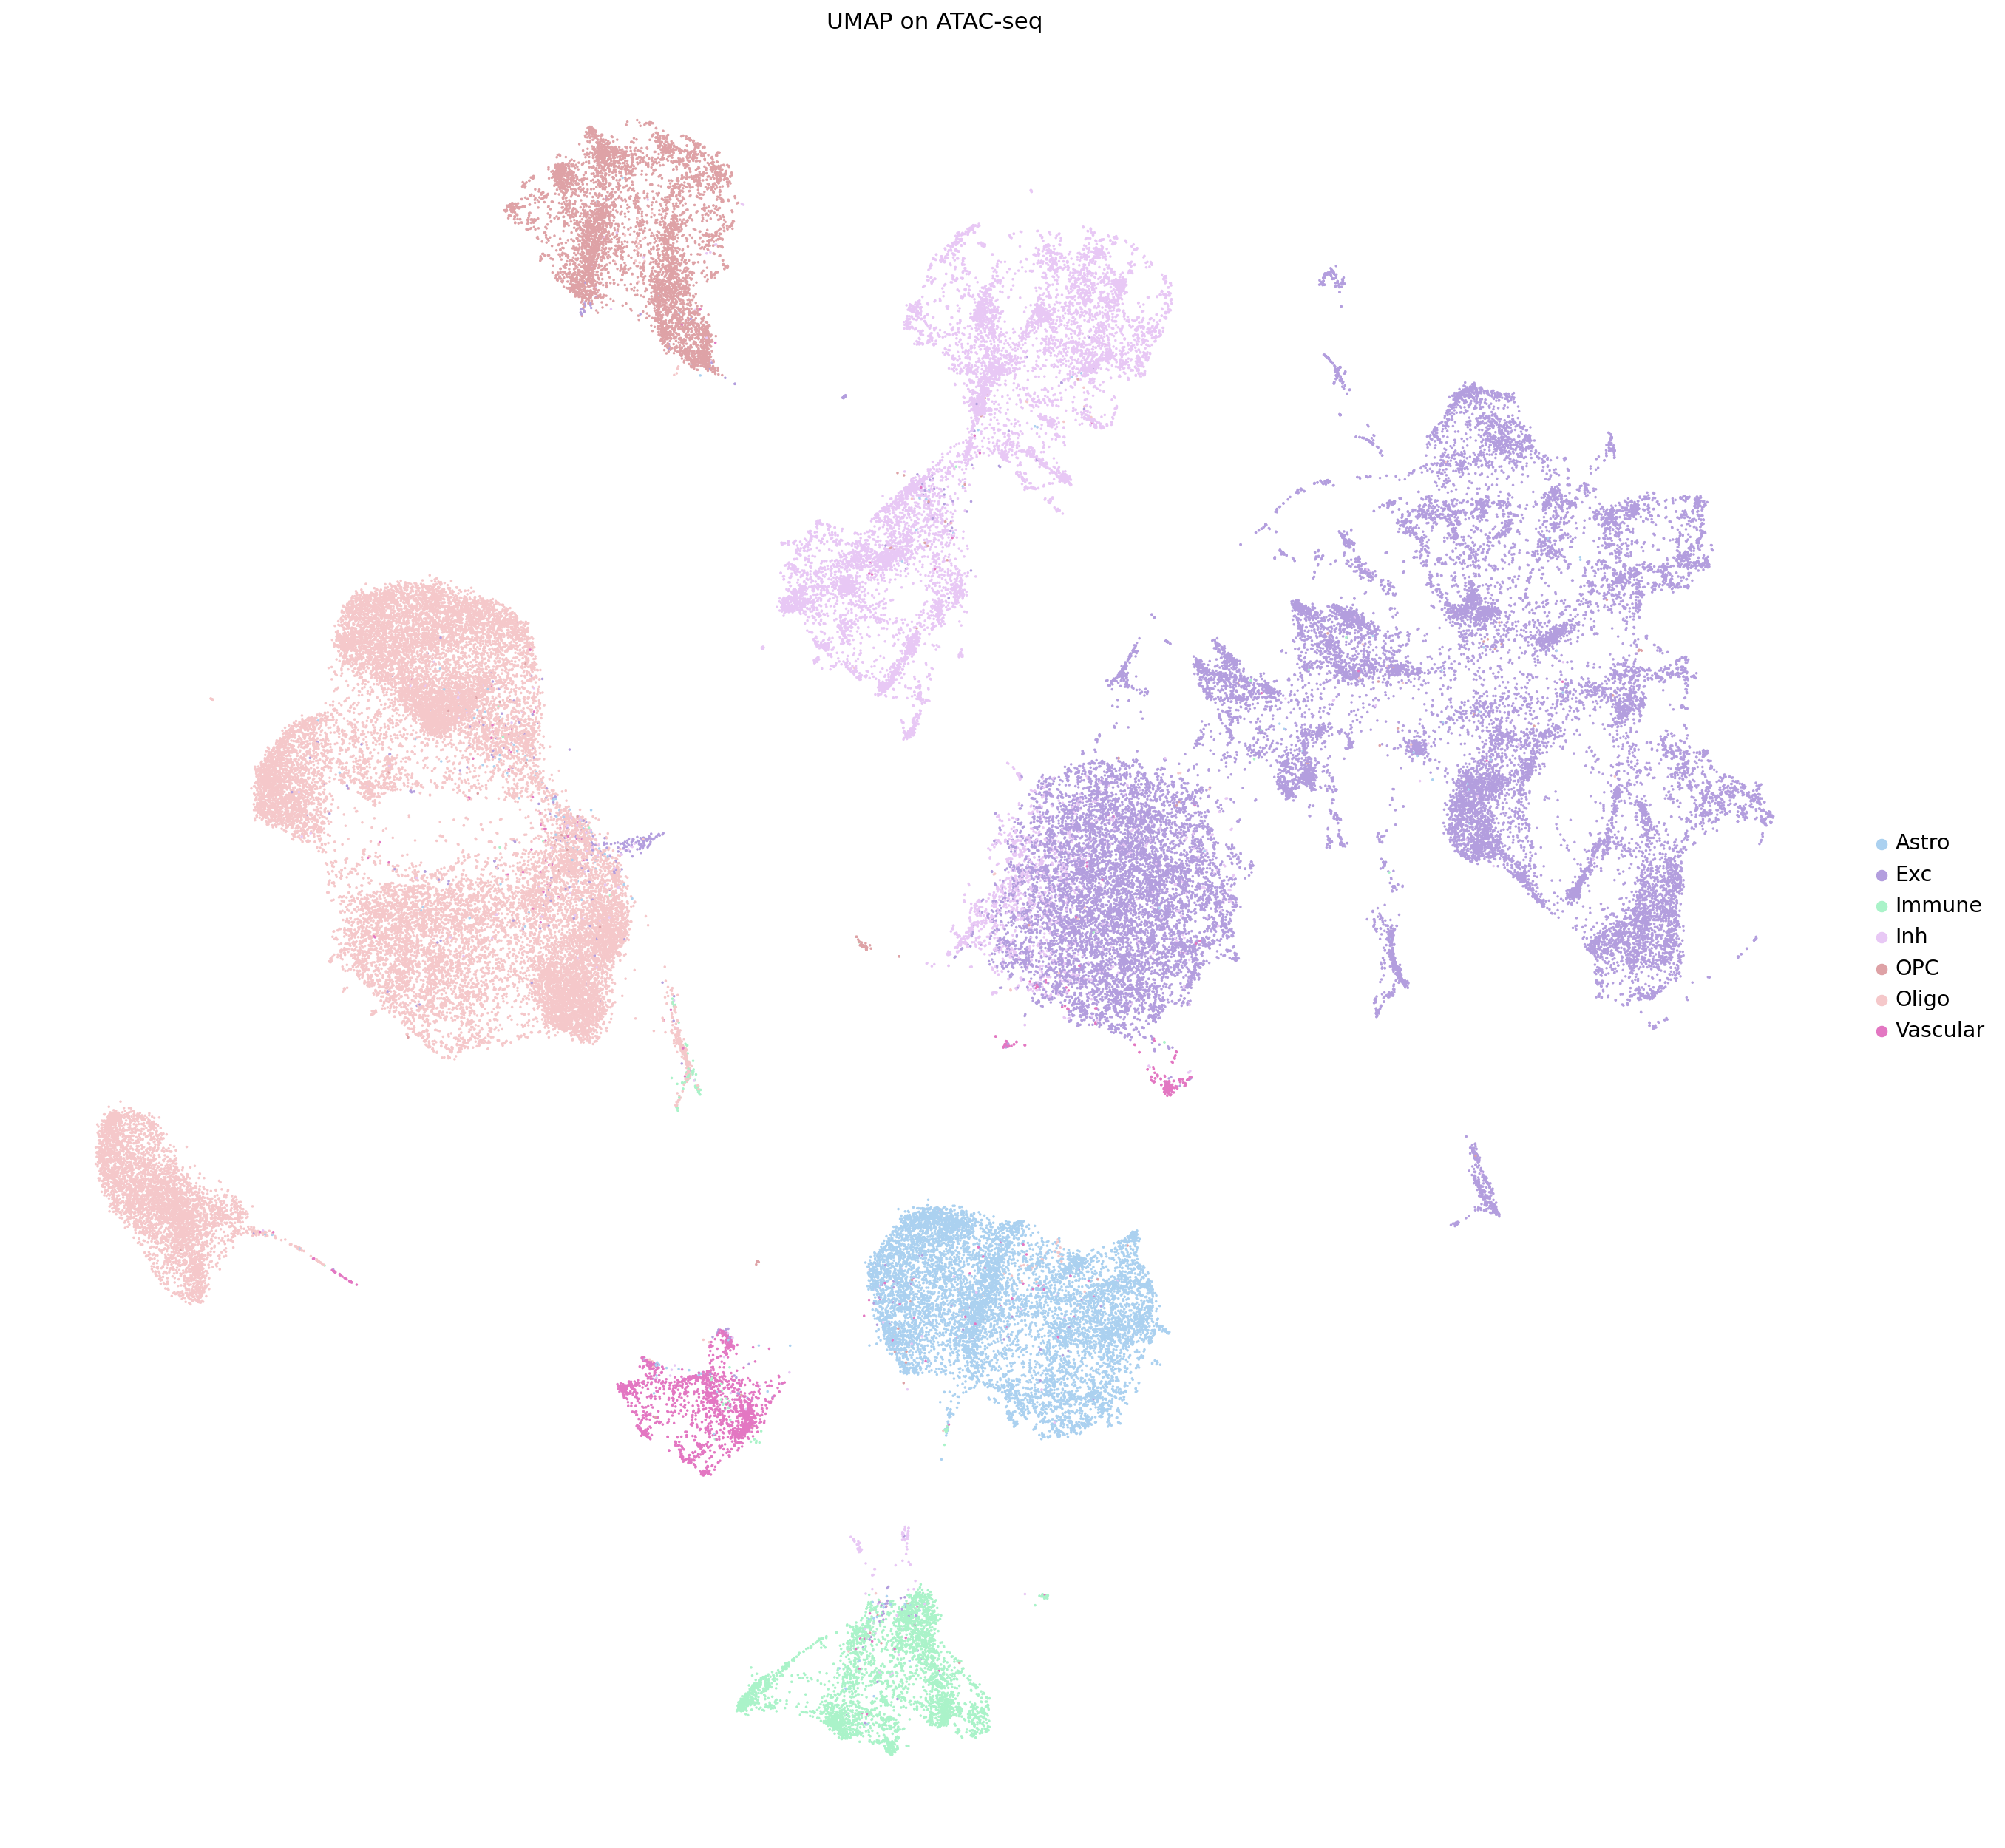

In [5]:
sc.set_figure_params(figsize=(20, 20))
sc.pl.umap(atac, color="cell_family",size=10,frameon=False, title='UMAP on ATAC-seq')

In [2]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

In [6]:
atac.obs.cell_family.value_counts().sort_index()

cell_family
Astro        9017
Exc         27495
Immune       3651
Inh         10716
OPC          5637
Oligo       26731
Vascular     1987
Name: count, dtype: int64

In [7]:
atac.obs.cell_family.value_counts().sort_index()/atac.obs.cell_family.value_counts().sort_index().sum()

cell_family
Astro       0.105791
Exc         0.322583
Immune      0.042835
Inh         0.125724
OPC         0.066136
Oligo       0.313619
Vascular    0.023312
Name: count, dtype: float64

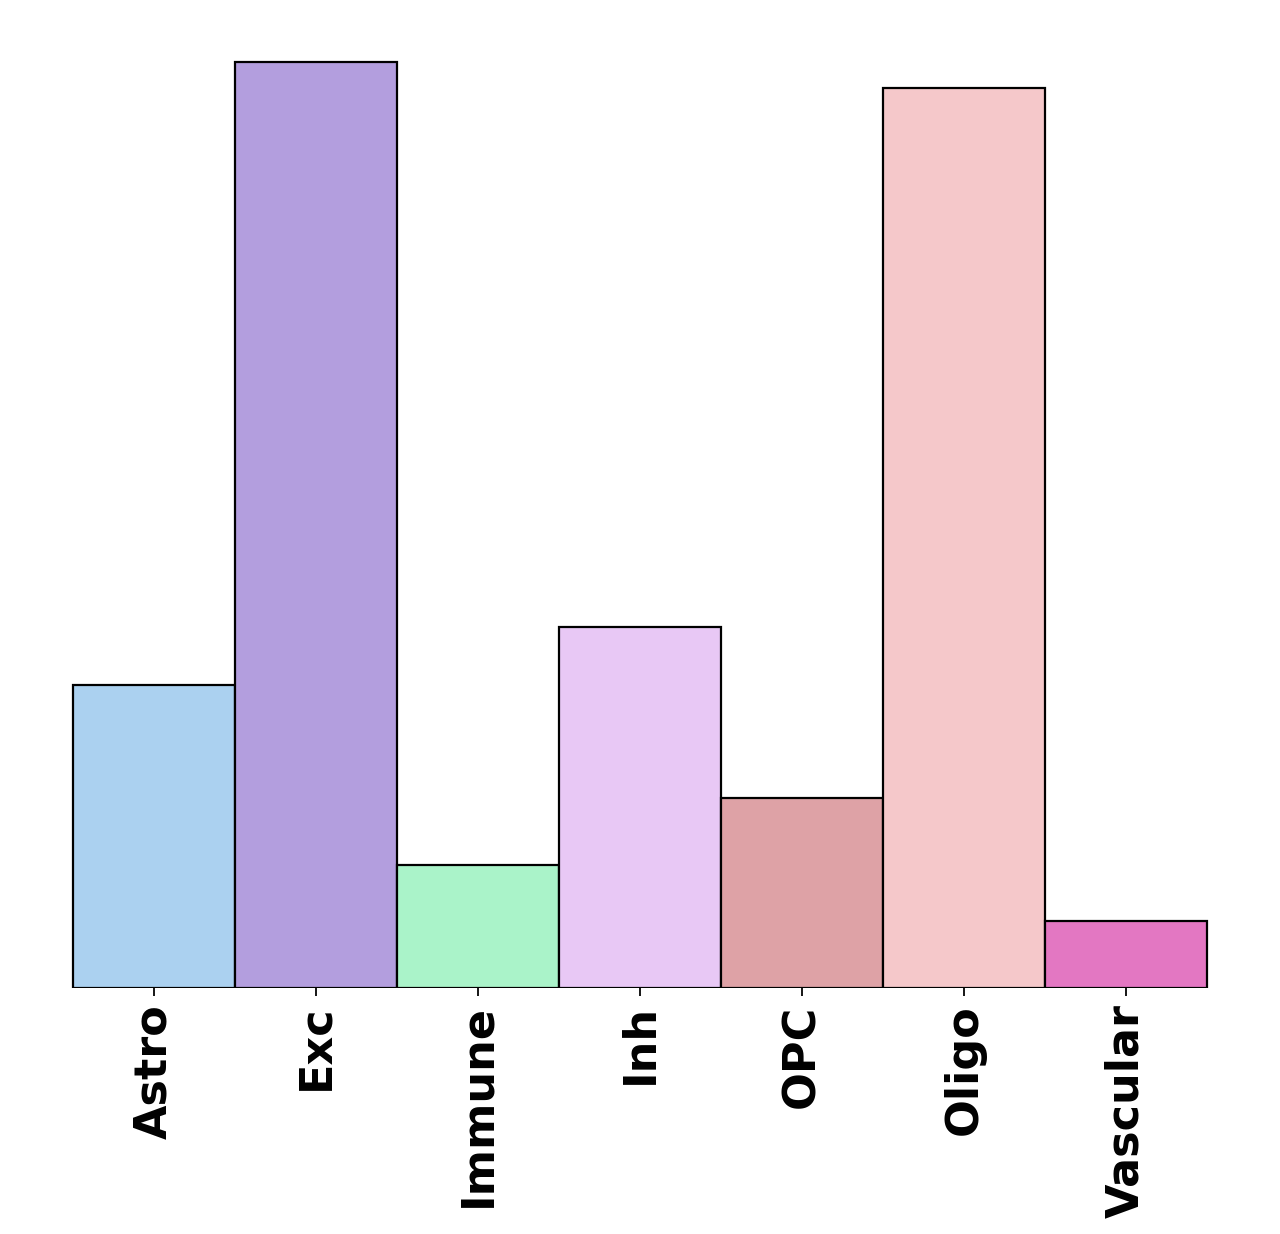

In [9]:
plt.figure(figsize = (10,8))
plt.grid(False)
plt.tick_params(axis='both',which='both',left=False,labelleft=False,labelright=False)#,labelbottom=False,bottom=False,top=False)
plt.yticks(size = 20, weight = 'bold')
plt.xticks(size = 20,weight='bold',rotation=90)
plt.bar(height=atac.obs.cell_family.value_counts().sort_index(),x=['Astro','Exc','Immune','Inh','OPC','Oligo','Vascular'],width=1,
        color=atac.uns['cell_family_colors'],edgecolor='black')
plt.savefig('../../results/SCORCH_HIV/figures/atacseq_bar_graph.tiff',dpi=350,bbox_inches = "tight")

In [18]:
atac.uns['cell_family_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2'], dtype=object)

/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


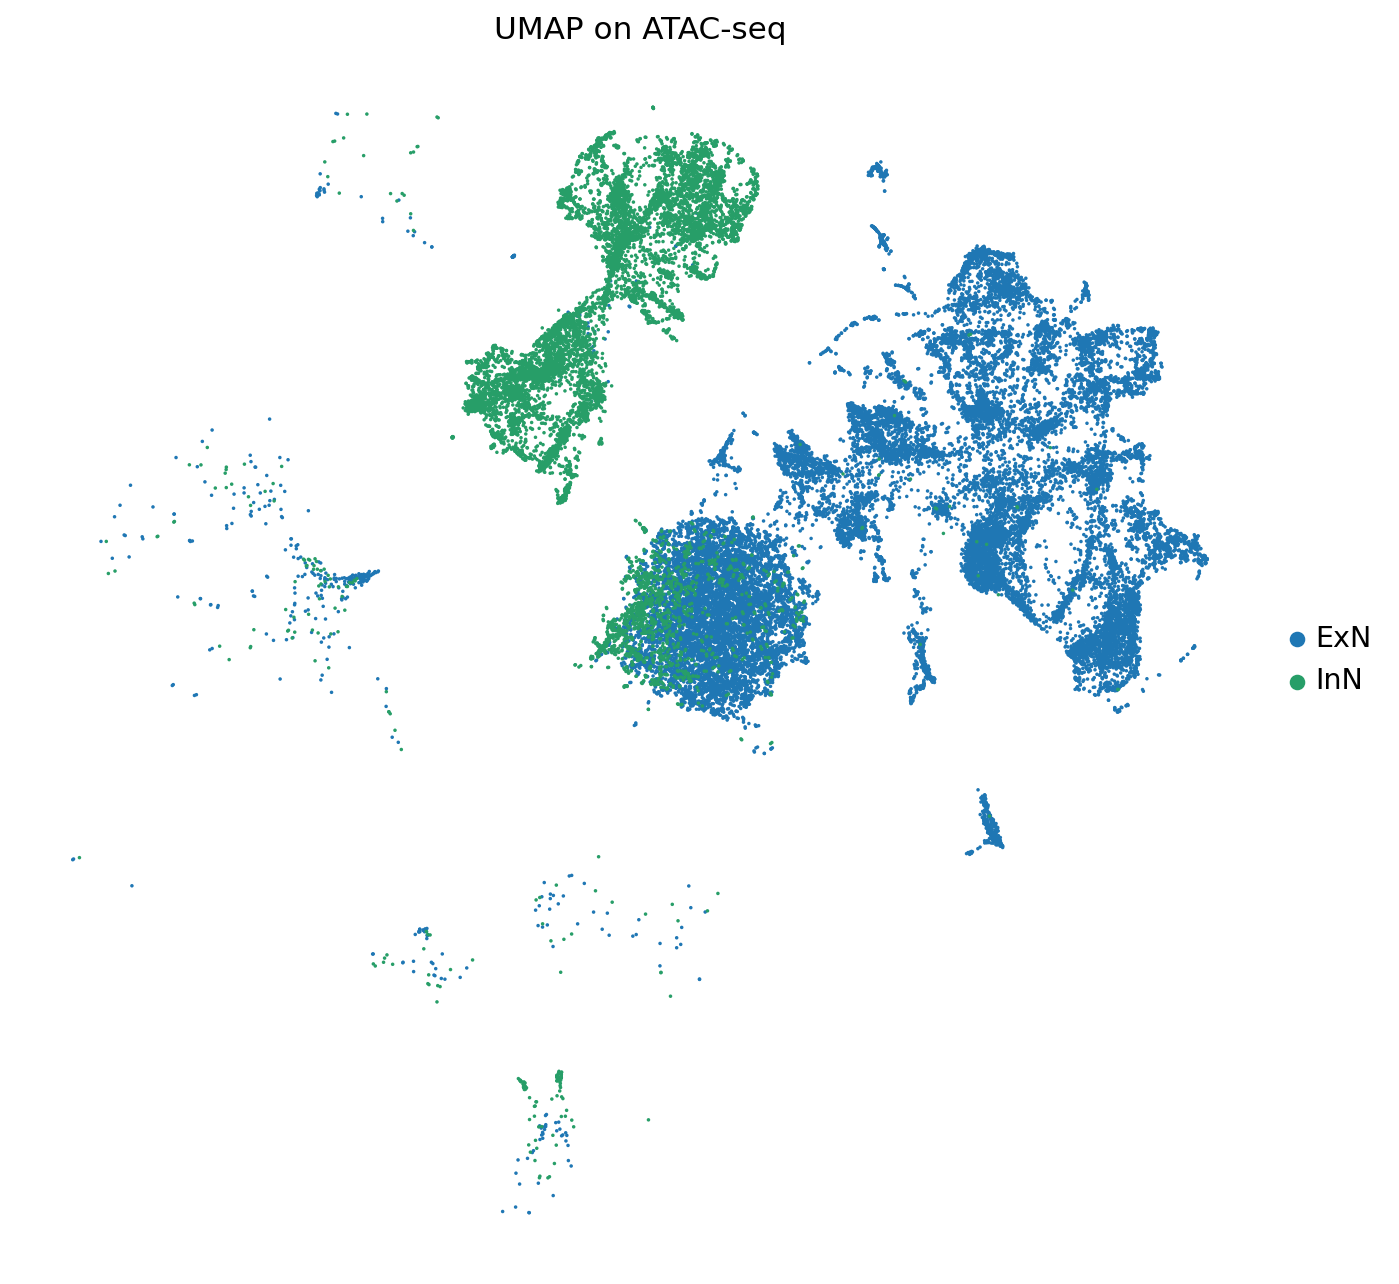

In [9]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(atac[exc+inh], color="class",size=10,frameon=False, title='UMAP on ATAC-seq')

Exc


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})


Peaks: 10000
Cells: 27495


/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /opt/applications/python/3.11.4/gnu/lib/python3.11/s ...
  rank_zero_warn(
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To proper

Epoch 418/500:  84%|███████████████████████████████████████████████████████████▎           | 418/500 [05:50<01:08,  1.19it/s, v_num=1, train_loss_step=685, train_loss_epoch=717]
Monitored metric reconstruction_loss_validation did not improve in the last 200 records. Best score: 732.788. Signaling Trainer to stop.


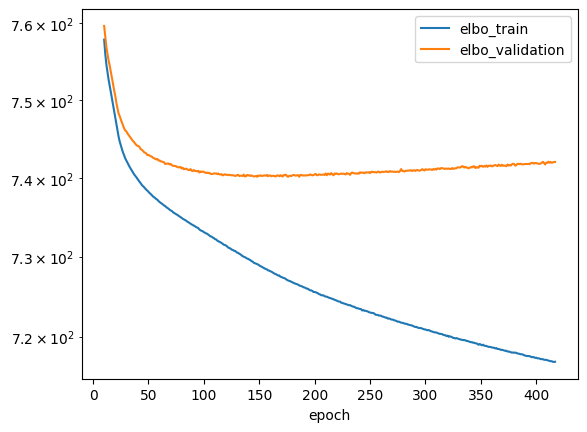

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.41s/it]
Inh


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 10000
Cells: 10716
Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [02:50<00:00,  2.95it/s, v_num=1, train_loss_step=1.56e+3, train_loss_epoch=1.52e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [02:50<00:00,  2.93it/s, v_num=1, train_loss_step=1.56e+3, train_loss_epoch=1.52e+3]


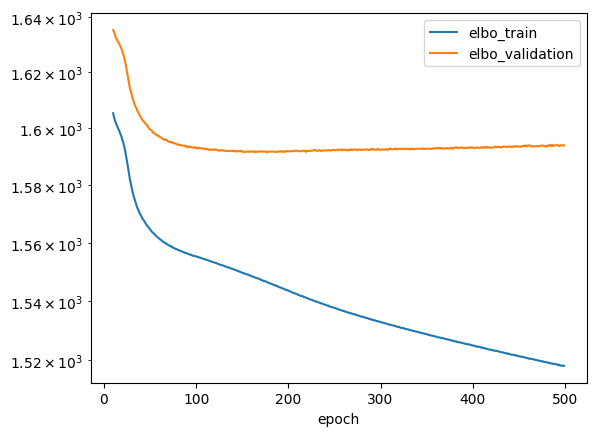

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.44s/it]
Oligo


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 10000
Cells: 26731
Epoch 384/500:  77%|█████████████████████████████████████████████████▏              | 384/500 [05:15<01:35,  1.22it/s, v_num=1, train_loss_step=1.19e+3, train_loss_epoch=1.1e+3]
Monitored metric reconstruction_loss_validation did not improve in the last 200 records. Best score: 1117.014. Signaling Trainer to stop.


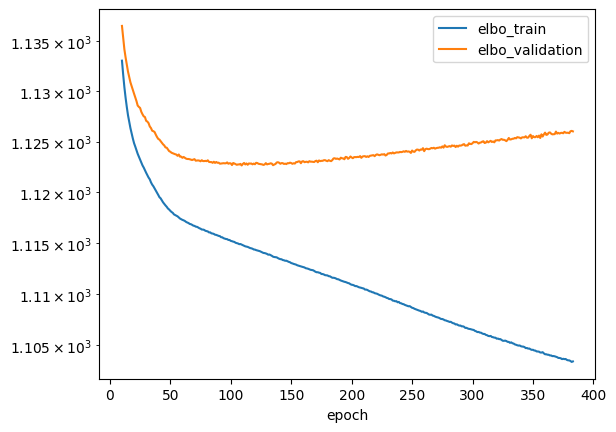

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.87s/it]
Immune


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 10000
Cells: 3651
Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [01:04<00:00,  7.74it/s, v_num=1, train_loss_step=3.26e+3, train_loss_epoch=3.34e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [01:05<00:00,  7.69it/s, v_num=1, train_loss_step=3.26e+3, train_loss_epoch=3.34e+3]


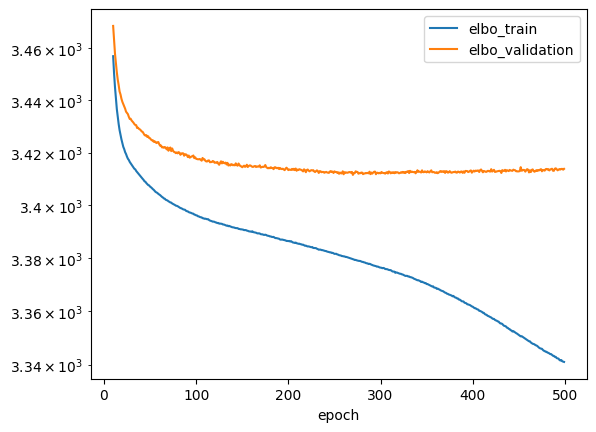

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.33s/it]
Astro


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 10000
Cells: 9017
Epoch 500/500: 100%|████████████████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.48it/s, v_num=1, train_loss_step=1.8e+3, train_loss_epoch=1.82e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|████████████████████████████████████████████████████████████████| 500/500 [02:24<00:00,  3.46it/s, v_num=1, train_loss_step=1.8e+3, train_loss_epoch=1.82e+3]


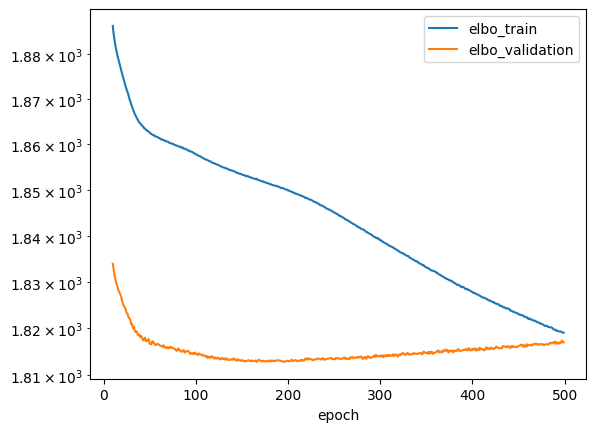

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.59s/it]
Vascular


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 1622
Cells: 1987
Epoch 500/500: 100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:28<00:00, 17.56it/s, v_num=1, train_loss_step=526, train_loss_epoch=545]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:28<00:00, 17.36it/s, v_num=1, train_loss_step=526, train_loss_epoch=545]


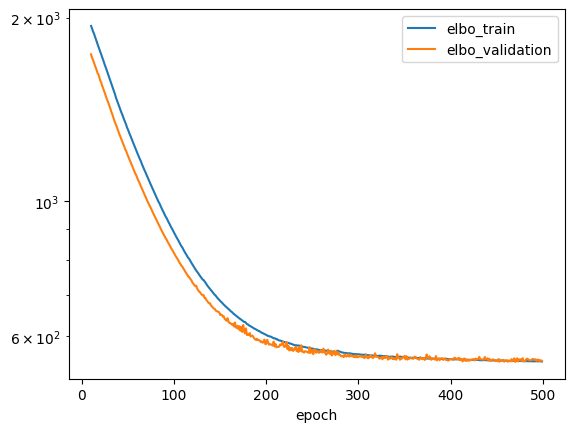

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.31s/it]
OPC


/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/applications/python/3.11.4/gnu/lib/python3.11/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_4831/2737266851.py:36: DeprecationWarning: `save_best` is deprecated in v1.2 and will be removed in v1.3. Please use `enable_checkpointing` instead. See https://github.com/scverse/scvi-tools/issues/2568 for more details.
  model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention i

Peaks: 10000
Cells: 5637
Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.40it/s, v_num=1, train_loss_step=2.45e+3, train_loss_epoch=2.48e+3]

`Trainer.fit` stopped: `max_epochs=500` reached.


Epoch 500/500: 100%|███████████████████████████████████████████████████████████████| 500/500 [01:33<00:00,  5.34it/s, v_num=1, train_loss_step=2.45e+3, train_loss_epoch=2.48e+3]


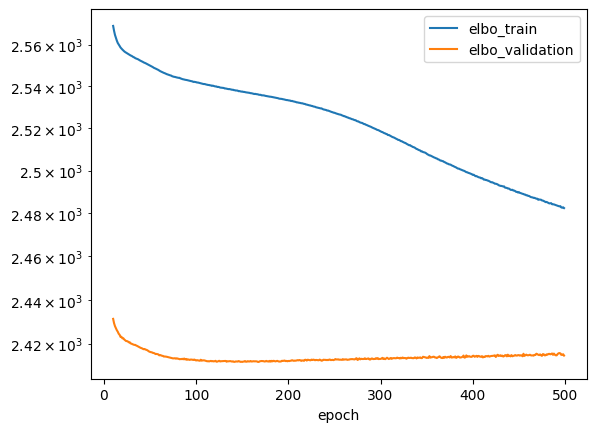

DE...: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.62s/it]


In [9]:
results_dir='/gpfs/home/ajoshi/results/SCORCH_HIV/differential_accessibility/'
'''
scvi.external.POISSONVI.setup_anndata(atac, layer="fragments")
model = scvi.external.POISSONVI(atac)
model.train(plan_kwargs={"lr": 0.0001})

train_test_results = model.history["elbo_train"]
train_test_results["elbo_validation"] = model.history["elbo_validation"]
train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
plt.show()

da_peaks = model.differential_accessibility(
    atac, idx1=atac.obs.condition=='hiv',idx2=atac.obs.condition=='controls',
    filter_outlier_cells=True,weights='uniform'
)
da_peaks["log10_pscore"] = (-1)*np.log10(da_peaks["proba_not_de"])
da_peaks.to_csv(results_dir+'allcells.tsv',sep='\t')
'''

for cell_family in pd.unique(atac.obs['cell_family']):
    #if cell_family in ['Vascular','Astro','OPC']: continue
    print(cell_family)
    atac_cell = atac[np.where(atac.obs['cell_family']==cell_family)[0]].copy()
    sc.pp.filter_genes(atac_cell, min_cells=200)
    sc.pp.highly_variable_genes(
        atac_cell,
        n_top_genes=10000,
        subset=True,
        flavor="seurat_v3"
        )
    
    print("Peaks: "+str(len(atac_cell.var)))
    print("Cells: "+str(len(atac_cell.obs)))
    scvi.external.POISSONVI.setup_anndata(atac_cell, layer="fragments")
    model = scvi.external.POISSONVI(atac_cell)  # We use Negative Binomial count likelihoods, following Boyeau et al., 2023.
    model.train(early_stopping_patience=200,batch_size=203,plan_kwargs={"lr": 0.001})
    train_test_results = model.history["elbo_train"]
    train_test_results["elbo_validation"] = model.history["elbo_validation"]
    train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
    plt.show()
    
    da_peaks = model.differential_accessibility(
        atac_cell, idx1=atac_cell.obs.condition=='hiv',idx2=atac_cell.obs.condition=='controls',
        filter_outlier_cells=True,weights='uniform'
    )
    da_peaks["log10_pscore"] = (-1)*np.log10(da_peaks["proba_not_de"])
    da_peaks.to_csv(results_dir+cell_family+'.tsv',sep='\t')

In [11]:
pd.unique(atac.obs.condition)

['controls', 'hiv']
Categories (2, object): ['controls', 'hiv']

In [15]:
def get_all_DEG(file_path_diff_exp):
    all_DEG = pd.DataFrame()
    for file in os.listdir(file_path_diff_exp):
        if 'tsv' in file and 'lfc' not in file and 'allcells' not in file:
            diff_exp = pd.read_csv(file_path_diff_exp+file, sep='\t',index_col=0)
            file = file.replace(" ","")
            cell_type = "".join(i for i in file.split('_')[0]).replace('.tsv',"")
            diff_exp.loc[:,'cell_type'] = cell_type
            diff_exp = diff_exp.reset_index().rename(columns={"index":'gene'})
        
            ######For numerical stability: replace infinite values with twice of maximum
            max_twice = diff_exp.loc[diff_exp['log10_pscore'] != np.inf, 'log10_pscore'].max()*2
            diff_exp['log10_pscore'].replace(np.inf,max_twice,inplace=True)
                
            #volcano(diff_exp,cell_type, file_path_diff_exp)
            all_DEG = pd.concat([all_DEG,diff_exp]) #Read in and saved in a previous run is used further in the volcano plot function
    all_DEG = all_DEG.reset_index(drop=True)
    return all_DEG

In [16]:
def get_selection_metric(df):
    selection_metric = df['bayes_factor'] * abs(df['lfc_median'])
    df.loc[:,'selection_metric'] = selection_metric
    return df

In [17]:
all_peaks = get_all_DEG('../../results/SCORCH_HIV/differential_accessibility/')
all_peaks = get_selection_metric(all_peaks)

/tmp/ipykernel_4831/2033498600.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diff_exp['log10_pscore'].replace(np.inf,max_twice,inplace=True)
/tmp/ipykernel_4831/2033498600.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [18]:
for genome_pos in all_peaks.index:
    all_peaks.loc[genome_pos,'chr']=all_peaks.loc[genome_pos,'gene'].split("-")[0]
    all_peaks.loc[genome_pos,'start']=all_peaks.loc[genome_pos,'gene'].split("-")[1]
    all_peaks.loc[genome_pos,'end']=all_peaks.loc[genome_pos,'gene'].split("-")[2]
all_peaks['start']=all_peaks['start'].astype('int')
all_peaks['end']=all_peaks['end'].astype('int')

In [38]:
all_peaks.iloc[np.where((all_peaks['is_de_fdr_0.05']==True)&(all_peaks['proba_not_de']<=0.05))[0],:]

gene  proba_de  proba_not_de  bayes_factor  \
0       chr5-134926327-134929025    0.9922        0.0078      4.845800   
1      chr12-113990117-113991271    0.9910        0.0090      4.701489   
2        chr19-20420617-20421578    0.9906        0.0094      4.657600   
3       chr1-109687298-109688274    0.9902        0.0098      4.615524   
4           chr2-3604893-3605778    0.9898        0.0102      4.575114   
...                          ...       ...           ...           ...   
60363   chr5-151771250-151772236    0.9500        0.0500      2.944439   
60364      chr18-9913396-9914350    0.9500        0.0500      2.944439   
60365      chr11-9460453-9461361    0.9500        0.0500      2.944439   
60366    chr16-30370412-30371462    0.9500        0.0500      2.944439   
60367    chr19-48713793-48714770    0.9500        0.0500      2.944439   

         scale1    scale2  pseudocounts  delta  lfc_mean  lfc_median  ...  \
0      0.000037  0.000104           0.0   0.05 -2.358153   -2.533032  ...   
1      0.000027  0.000045           0.0   0.05 -1.696554   -1.899759  ...   
2      0.000088  0.000028           0.0   0.05  1.827464    1.852769  ...   
3      0.000129  0.000028           0.0   0.05  2.898598    2.957738  ...   
4      0.000022  0.000084           0.0   0.05 -2.412437   -2.498427  ...   
...         ...       ...           ...    ...       ...         ...  ...   
60363  0.000580  0.000521           0.0   0.05  0.090074    0.187848  ...   
60364  0.000460  0.000419           0.0   0.05  0.069062    0.164595  ...   
60365  0.000425  0.000375           0.0   0.05  0.140388    0.190250  ...   
60366  0.000515  0.000478           0.0   0.05  0.024399    0.156353  ...   
60367  0.000507  0.000464           0.0   0.05  0.045897    0.158305  ...   

       emp_prob1  emp_prob2  emp_effect  is_de_fdr_0.05  log10_pscore  \
0       0.020656   0.022411   -0.001755            True      2.107905   
1       0.009245   0.011477   -0.002232            True      2.045757   
2       0.035566   0.005501    0.030065            True      2.026872   
3       0.051058   0.000951    0.050107            True      2.008774   
4       0.004081   0.022886   -0.018805            True      1.991400   
...          ...        ...         ...             ...           ...   
60363   0.162907   0.162025    0.000882            True      1.301030   
60364   0.121136   0.122785   -0.001649            True      1.301030   
60365   0.123642   0.139241   -0.015598            True      1.301030   
60366   0.140351   0.196203   -0.055852            True      1.301030   
60367   0.146199   0.131646    0.014553            True      1.301030   

       cell_type  selection_metric    chr      start        end  
0          Oligo         12.274566   chr5  134926327  134929025  
1          Oligo          8.931695  chr12  113990117  113991271  
2          Oligo          8.629459  chr19   20420617   20421578  
3          Oligo         13.651509   chr1  109687298  109688274  
4          Oligo         11.430591   chr2    3604893    3605778  
...          ...               ...    ...        ...        ...  
60363   Vascular          0.553107   chr5  151771250  151772236  
60364   Vascular          0.484640  chr18    9913396    9914350  
60365   Vascular          0.560179  chr11    9460453    9461361  
60366   Vascular          0.460373  chr16   30370412   30371462  
60367   Vascular          0.466120  chr19   48713793   48714770  

[31005 rows x 23 columns]

In [20]:
############## Read in GENCODE for protein coding genes ################
gencode=read_gtf("../../gencode.v44.annotation.gtf")
protein_coding_genes = list(gencode.gene_name[np.where((gencode.feature=='gene')
            &(gencode.gene_type=='protein_coding')
            )[0]])

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'tag', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid', 'artif_dupl']


In [36]:
gencode.iloc[np.where((gencode.feature=='gene')
                     &(gencode.gene_name=='NIPSNAP1'))[0],[0,3,4]]

seqname     start       end
3247857   chr22  29554808  29581327

In [37]:
all_peaks.iloc[np.where((all_peaks['cell_type']=='Exc')
                        &(all_peaks['is_de_fdr_0.05']==True)
                       &(all_peaks['gene'].str.contains('chr22'))
                        &(all_peaks['start']>29554808)
                        &(all_peaks['end']<29581327)
                       )[0],
[0,9,16,18]]

gene  lfc_median  is_de_fdr_0.05 cell_type
54369  chr22-29555050-29556018    0.239656            True       Exc

In [137]:
min(atac.var['end'].astype('int')-atac.var['start'].astype('int'))

274

In [138]:
max(atac.var['end'].astype('int')-atac.var['start'].astype('int'))

4227

In [140]:
np.mean(atac.var['end'].astype('int')-atac.var['start'].astype('int'))

1065.5712026567564

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7b5a5089d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7b5a3dc3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7b5a229c10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7b5a3df850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7b5a3d5f50>],
 'means': []}

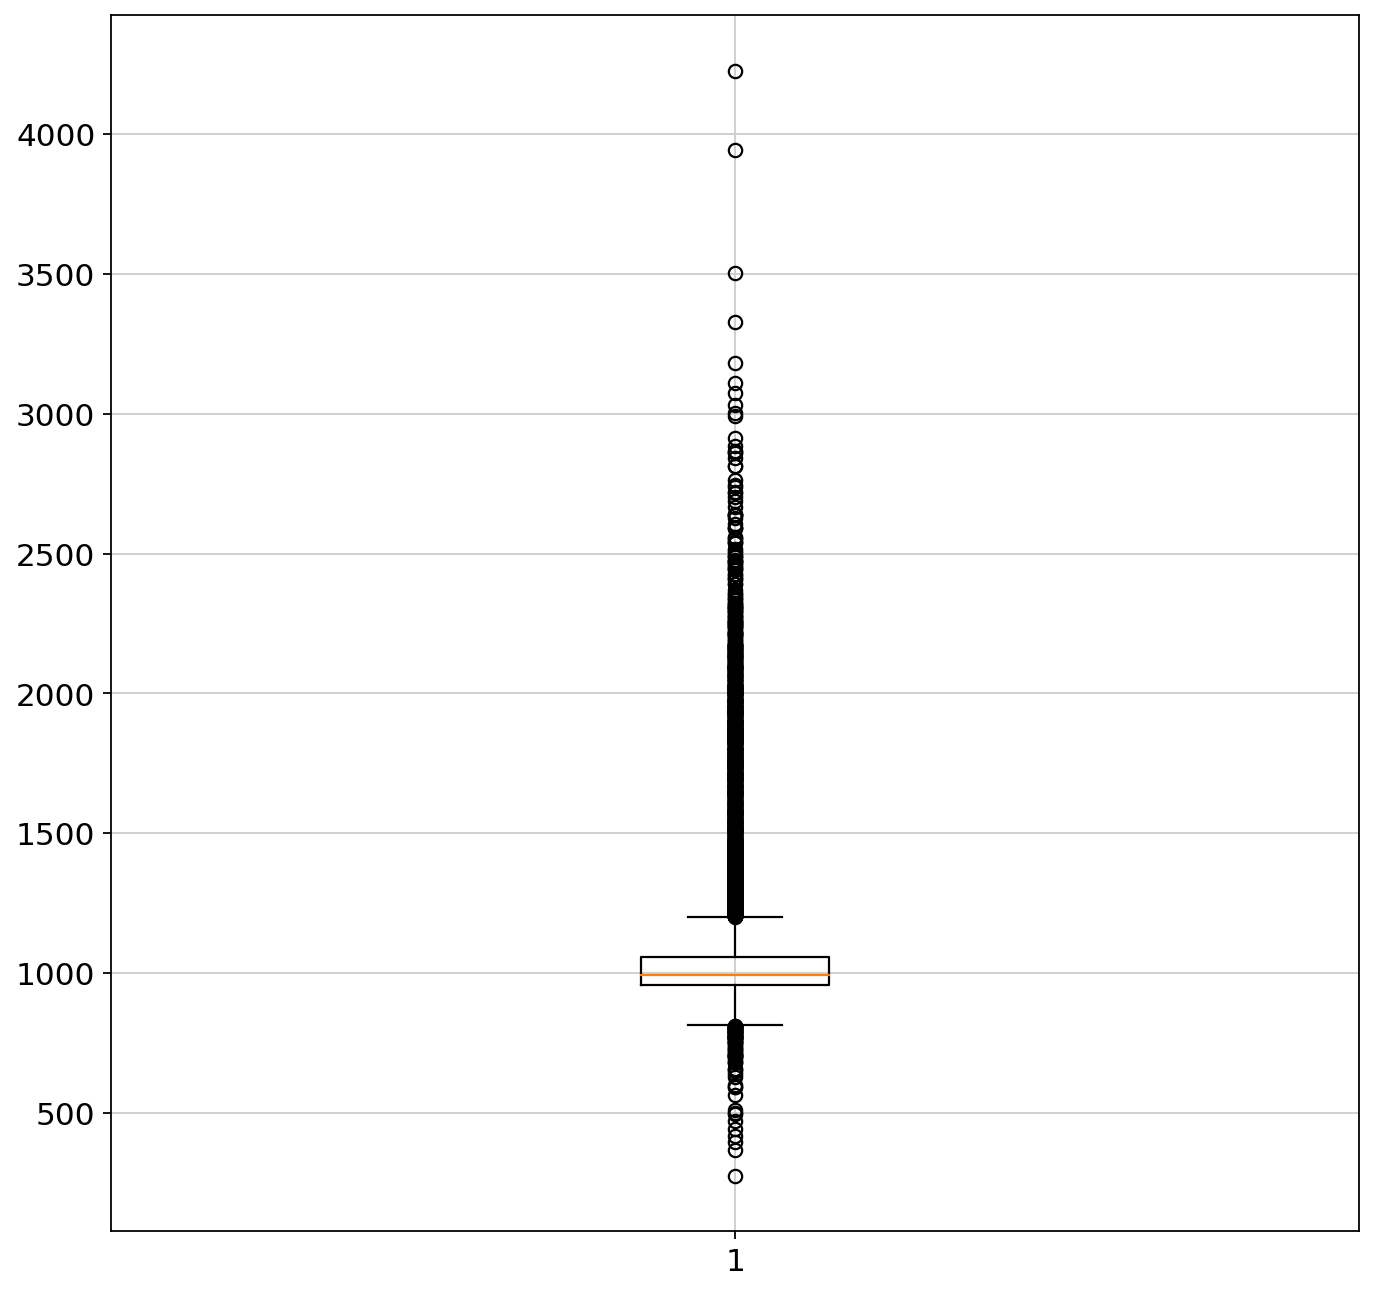

In [142]:
plt.boxplot(atac.var['end'].astype('int')-atac.var['start'].astype('int'))

In [ ]:
chr7:31334139-31345010